# Checking requisites

In [88]:
! pip install pandas numpy seaborn matplotlib scikit-learn imblearn xgboost

# Importing Libraries

In [199]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer
from sklearn.impute import SimpleImputer
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import datetime
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn import preprocessing

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt




In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Uploading data

In [91]:
d_training = pd.read_csv('./data/base_clientes.csv')
d_out = pd.read_csv('./data/base_hist_churn.csv')
d_price = pd.read_csv('./data/base_precos.csv')

# Exploratory Data Analysis and Cleaning

## Initial descriptive analysis

In [92]:
d_training.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,NaN,...,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,NaN,...,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,NaN,...,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321


In [93]:
d_training.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,2.012000e+04,2.012000e+04,2.012000e+04,4385.000000,4385.000000,4385.000000,4385.000000,20120.000000,20120.000000,...,19970.000000,19970.000000,19970.000000,20120.000000,20105.000000,20105.000000,20120.00000,20102.000000,20120.000000,20116.000000
mean,NaN,1.949648e+05,3.196017e+04,1.953380e+04,344.466267,344.466267,3907.823737,214.150812,2370.826669,1912.253529,...,0.135960,0.052889,43.543557,196.822941,22.475752,21.353071,1.34826,217.304279,5.023658,20.578284
std,NaN,6.754792e+05,1.782284e+05,8.087283e+04,724.065119,724.065119,5700.747714,542.506310,4047.481373,5231.517730,...,0.026286,0.048587,5.173667,498.026444,23.853275,28.838847,1.45777,356.223220,1.678148,21.833836
min,NaN,-1.252760e+05,-4.275000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,-2.090000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-528.640000,-981.560000,1.00000,-4148.990000,1.000000,0.000000
25%,NaN,5.832750e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1162.140000,0.000000,509.840000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.970000,11.950000,1.00000,51.542500,4.000000,12.500000
50%,NaN,1.533450e+04,0.000000e+00,9.060000e+02,162.600000,162.600000,2220.850000,40.830000,1176.745000,378.500000,...,0.142881,0.086163,44.311378,44.820000,21.090000,21.000000,1.00000,119.425000,5.000000,13.856000
75%,NaN,5.035500e+04,0.000000e+00,4.119500e+03,398.500000,398.500000,4273.450000,228.660000,2700.552500,2019.000000,...,0.146348,0.098837,44.311378,220.850000,29.640000,29.500000,1.00000,276.965000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,19021.240000,19021.240000,81122.630000,18267.500000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,18267.500000,500.320000,500.320000,32.00000,24570.650000,16.000000,500.000000


In [94]:
d_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20120 non-null  object 
 1   activity_new              8221 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             14846 non-null  object 
 4   cons_12m                  20120 non-null  int64  
 5   cons_gas_12m              20120 non-null  int64  
 6   cons_last_month           20120 non-null  int64  
 7   date_activ                20120 non-null  object 
 8   date_end                  20118 non-null  object 
 9   date_first_activ          4385 non-null   object 
 10  date_modif_prod           19918 non-null  object 
 11  date_renewal              20076 non-null  object 
 12  forecast_base_bill_ele    4385 non-null   float64
 13  forecast_base_bill_year   4385 non-null   float64
 14  foreca

In [95]:
d_price.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000
mean,0.141013,0.054352,0.030709,43.333166,10.699025,6.458055
std,0.025113,0.050004,0.036324,5.403902,12.853889,7.783320
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085474,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101674,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [96]:
d_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241238 entries, 0 to 241237
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            241238 non-null  object 
 1   price_date    241238 non-null  object 
 2   price_p1_var  239577 non-null  float64
 3   price_p2_var  239577 non-null  float64
 4   price_p3_var  239577 non-null  float64
 5   price_p1_fix  239577 non-null  float64
 6   price_p2_fix  239577 non-null  float64
 7   price_p3_fix  239577 non-null  float64
dtypes: float64(6), object(2)
memory usage: 14.7+ MB


In [97]:
d_out.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [98]:
d_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [99]:

d_training.shape

(20120, 32)

In [100]:
d_training.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

<Axes: xlabel='Features', ylabel='Missing values (%)'>

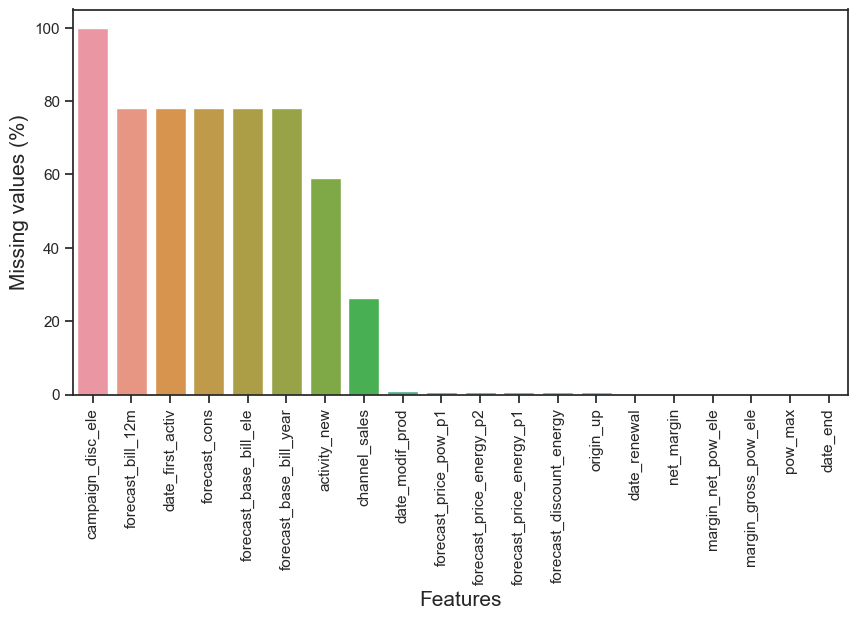

In [101]:
nan_count = ((d_training.isnull().sum()/d_training.shape[0])*100).sort_values(ascending=False)
nan_count = nan_count[nan_count>0]
plt.figure(figsize=(10,5))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Missing values (%)', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=nan_count.index, y=nan_count.values)

Campaign_disc_ele is 100% empty!

Removing it and the others 5 features with high null percentage...

In [102]:
d_training.drop(nan_count.index[:6],axis=1,inplace=True)
d_training.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,27/08/2021,07/09/2021,...,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,13/12/2016,01/01/2022,...,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,27/08/2021,05/09/2021,...,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
3,cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,03/01/2017,03/01/2023,03/01/2017,04/01/2022,...,44.311378,f,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
4,c7c8ee9daf2a864d159d45a2373ada72,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,07/10/2017,07/10/2022,27/08/2021,09/10/2021,...,44.311378,f,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150


In [103]:
d_training['activity_new'] = d_training['activity_new'].fillna('new activity')
d_training['channel_sales'] = d_training['channel_sales'].fillna('new channel')

In [104]:
d_training[nan_count.index[7:]].nunique()

channel_sales                   8
date_modif_prod              2423
forecast_price_pow_p1          48
forecast_price_energy_p2      439
forecast_price_energy_p1      658
forecast_discount_energy       14
origin_up                       6
date_renewal                  420
net_margin                  15761
margin_net_pow_ele           3338
margin_gross_pow_ele         3304
pow_max                       985
date_end                      372
dtype: int64

In [105]:
d_training[nan_count.index[7:]].isnull().sum()

channel_sales                 0
date_modif_prod             202
forecast_price_pow_p1       150
forecast_price_energy_p2    150
forecast_price_energy_p1    150
forecast_discount_energy    150
origin_up                   114
date_renewal                 44
net_margin                   18
margin_net_pow_ele           15
margin_gross_pow_ele         15
pow_max                       4
date_end                      2
dtype: int64

Filling missing dates with the next row.

In [106]:
d_training[['date_modif_prod','date_renewal','date_end']] = d_training[['date_modif_prod','date_renewal', 'date_end']].fillna(method='bfill')

Replacing missing values with most frequent.

In [107]:
origin_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
d_training[['origin_up']] = origin_imp.fit_transform(d_training[['origin_up']])

In [108]:
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
d_training[[x for x in nan_count.index[7:] if x not in ['date_modif_prod', 'date_renewal','origin_up','date_end']]] = imp_freq.fit_transform(
    d_training[[x for x in nan_count.index[7:] if x not in ['date_modif_prod', 'date_renewal','origin_up','date_end']]])

In [109]:
df = pd.merge(d_training, d_out, on=['id'])


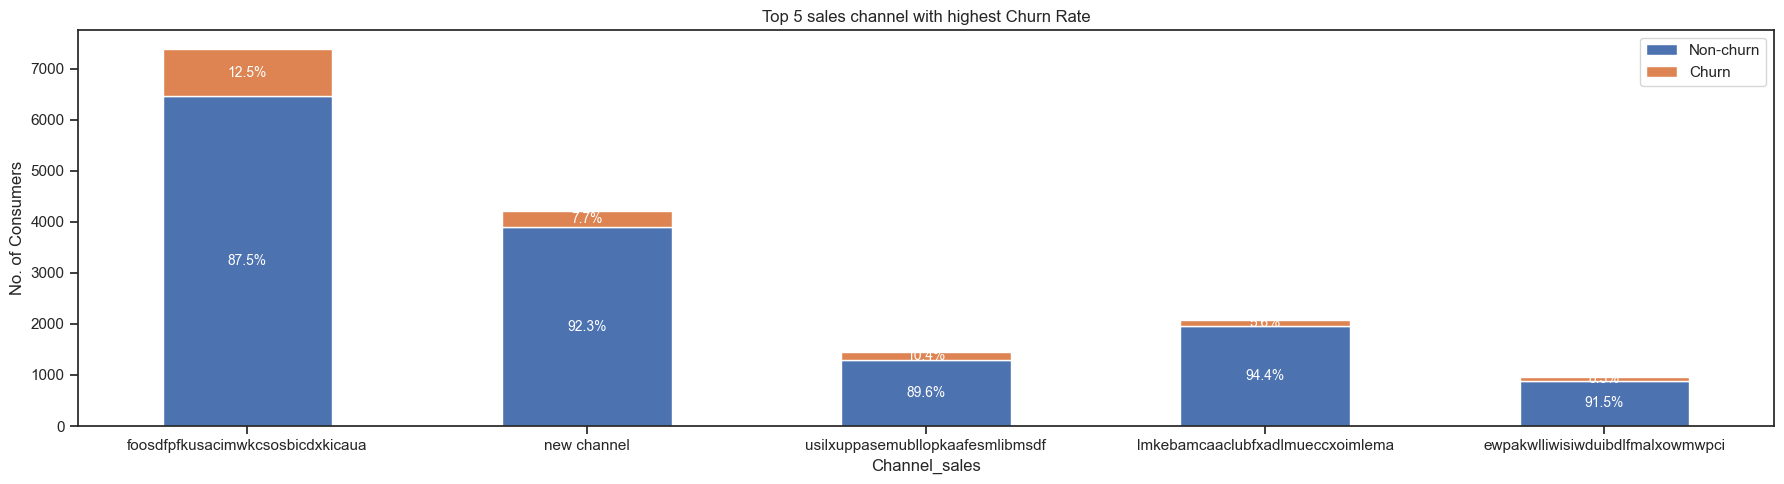

In [110]:
sales = df[["channel_sales", "churn", "id"]].groupby([
    "channel_sales", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:5]
sales_percentage = (sales.div(sales.sum(axis=1), axis=0) * 100)

# Plotting
ax = sales.plot(kind="bar", figsize=(18, 5), stacked=True, rot=0, title="Top 5 sales channel with highest Churn Rate")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in sales.index}

# Add percentage annotations to each bar
for channel in sales.index:
    for col in sales.columns:
        value = sales.loc[channel, col]
        percentage = sales_percentage.loc[channel, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[channel] + value/2
        ax.text(sales.index.get_loc(channel), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[channel] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("Channel_sales")
plt.tight_layout()
plt.show()


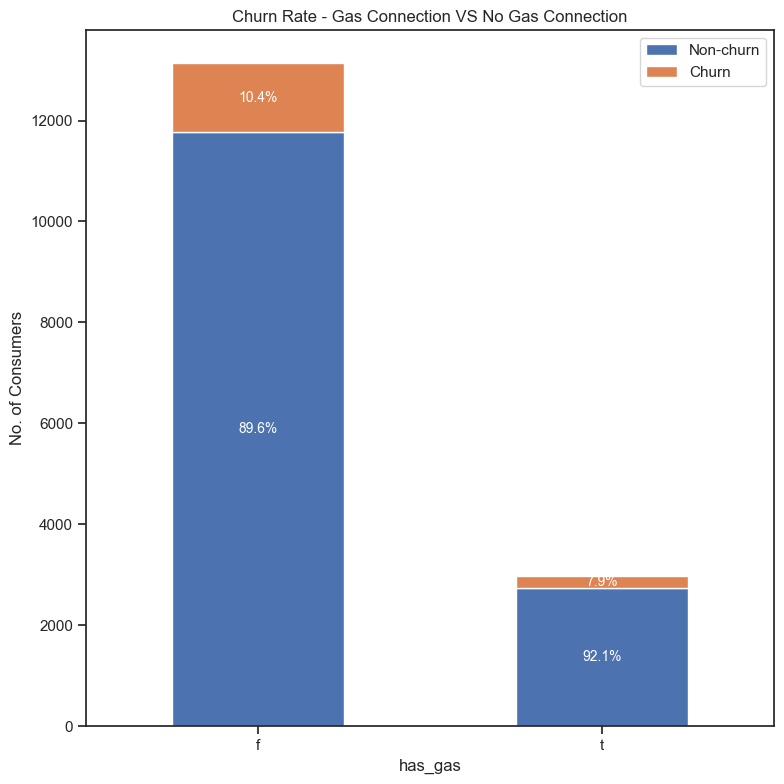

In [111]:
cons_12m = df[["has_gas", "churn", "id"]].groupby([
    "has_gas", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(8, 8), stacked=True, rot=0, title="Churn Rate - Gas Connection VS No Gas Connection")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for gas_status in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[gas_status, col]
        percentage = cons_12m_percentage.loc[gas_status, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[gas_status] + value/2
        ax.text(cons_12m.index.get_loc(gas_status), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[gas_status] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("has_gas")
plt.tight_layout()
plt.show()


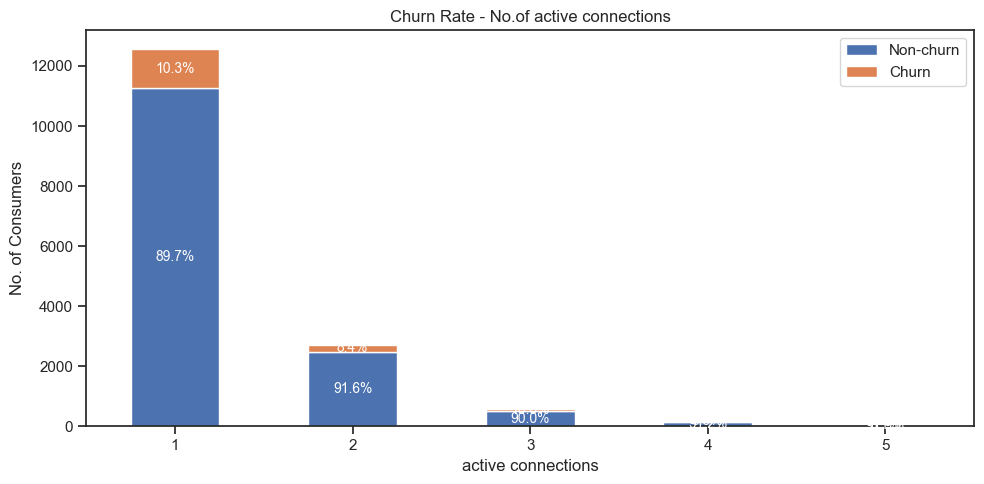

In [112]:
cons_12m = df[["nb_prod_act", "churn", "id"]].groupby([
    "nb_prod_act", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:5]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(10, 5), stacked=True, rot=0, title="Churn Rate - No.of active connections")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for conn_status in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[conn_status, col]
        percentage = cons_12m_percentage.loc[conn_status, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[conn_status] + value/2
        ax.text(cons_12m.index.get_loc(conn_status), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[conn_status] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("active connections")
plt.tight_layout()
plt.show()

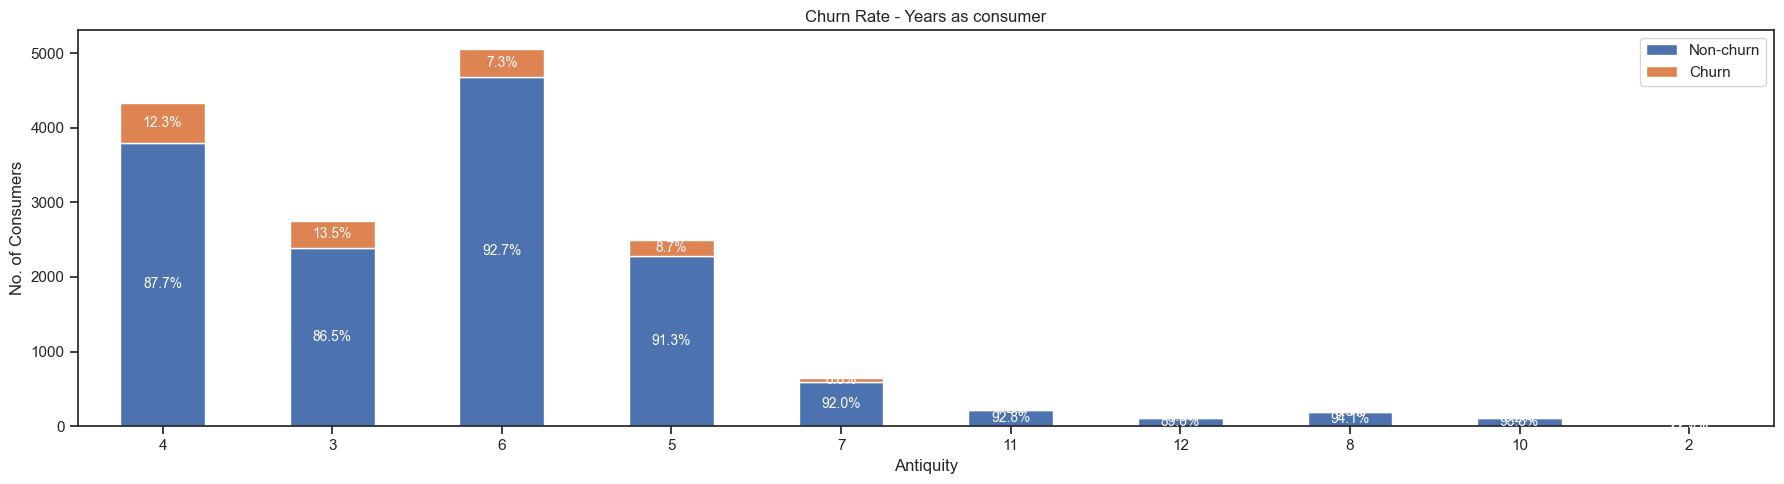

In [113]:
cons_12m = df[["num_years_antig", "churn", "id"]].groupby([
    "num_years_antig", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:10]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(18, 5), stacked=True, rot=0, title="Churn Rate - Years as consumer")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for year in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[year, col]
        percentage = cons_12m_percentage.loc[year, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[year] + value/2
        ax.text(cons_12m.index.get_loc(year), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[year] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("Antiquity")
plt.tight_layout()
plt.show()

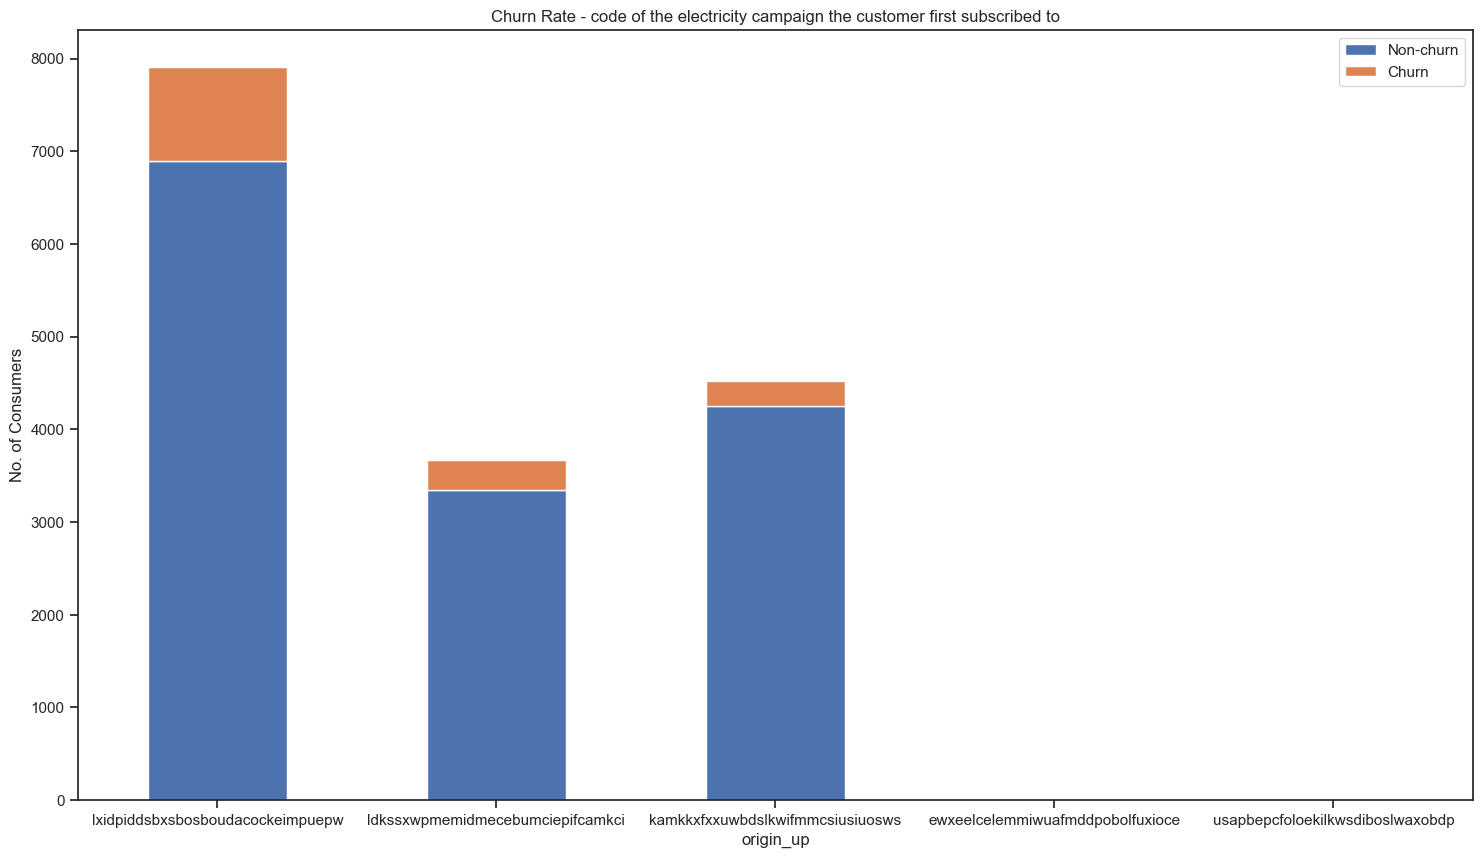

In [114]:
cons_12m = df[["origin_up",
               "churn", "id"]].groupby([
    "origin_up","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0)*100)
cons_12m.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - code of the electricity campaign the customer first subscribed to")
# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("origin_up")
plt.show()

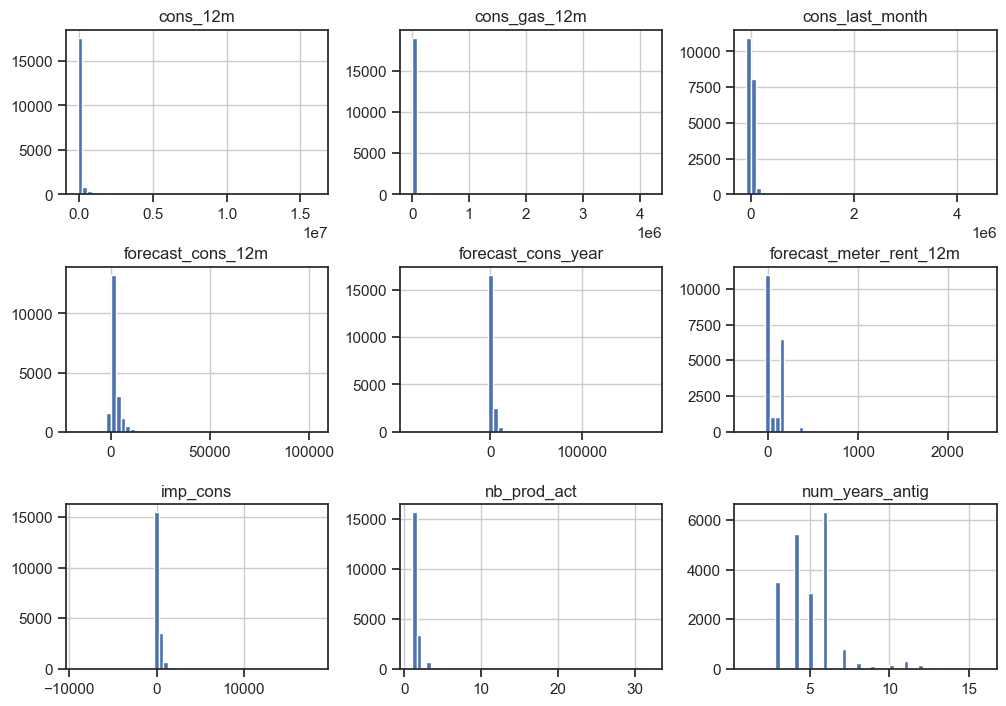

In [115]:
d_training.hist(bins=50, figsize=(10,7))
plt.tight_layout(pad=0.4)
plt.show()

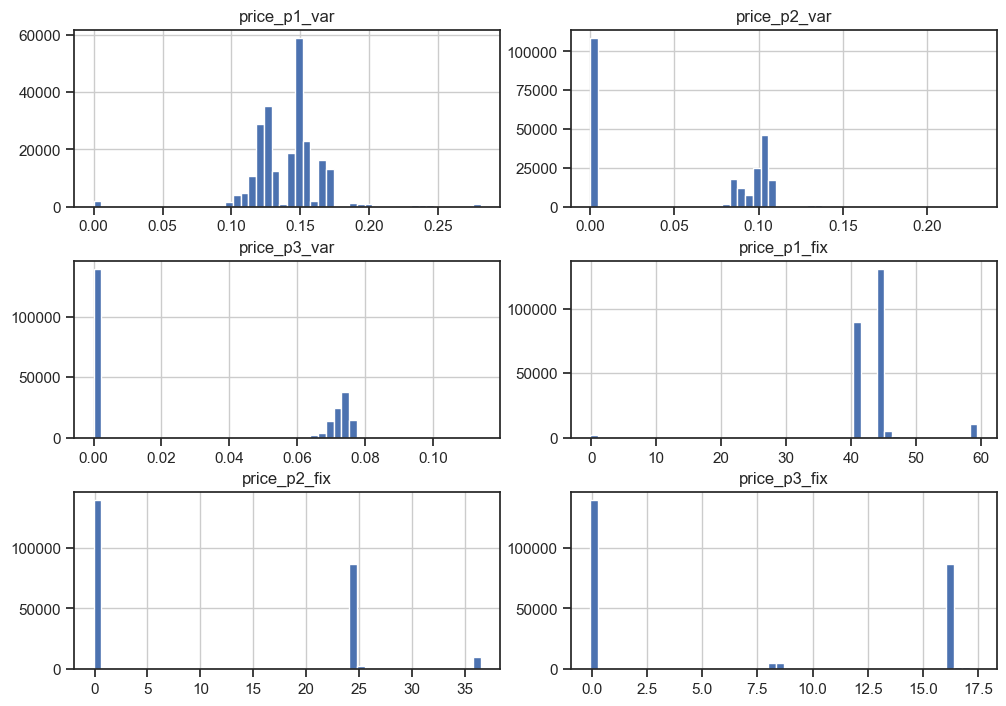

In [116]:
d_price.hist(bins=50, figsize=(10,7))
plt.tight_layout(pad=0.4)
plt.show()

In [117]:
# List of date columns
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

# For each column, remove problematic dates
for col in date_columns:
    mask = pd.to_datetime(df[col], dayfirst=True, errors='coerce').isna()
    problematic_dates = df[col][mask]

    # If there are problematic dates, print them and remove associated rows
    if len(problematic_dates) > 0:
        print(f"Problematic dates in {col}:")
        print(problematic_dates)
        df.drop(index=problematic_dates.index, inplace=True)

# Convert each column to DateTime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col], dayfirst=True)

Problematic dates in date_activ:
1264     29/02/2018
1577     29/02/2018
4218     29/02/2018
6302     29/02/2018
7246     29/02/2018
8648     29/02/2018
13622    29/02/2018
15115    29/02/2018
Name: date_activ, dtype: object
Problematic dates in date_end:
47       29/02/2022
572      29/02/2022
1644     29/02/2022
1888     29/02/2022
2163     29/02/2022
            ...    
15304    29/02/2022
15557    29/02/2022
15574    29/02/2022
15654    29/02/2022
15788    29/02/2022
Name: date_end, Length: 65, dtype: object


## Identification of numerical and categorical columns

In [118]:
numerica_cols = ["cons_12m", "cons_gas_12m", "cons_last_month", "date_activ", "date_end", "date_first_activ", "date_modif_prod", "date_renewal", "forecast_base_bill_ele", "forecast_base_bill_year", "forecast_bill_12m", "forecast_cons", "forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy", "forecast_meter_rent_12m", "forecast_price_energy_p1", "forecast_price_energy_p2", "forecast_price_pow_p1", "imp_cons", "margin_gross_pow_ele", "margin_net_pow_ele", "nb_prod_act", "net_margin", "num_years_antig", "pow_max"]
categorica_cols = ["id", "activity_new", "campaign_disc_ele", "channel_sales", "has_gas", "origin_up", "churn"]

print('Colunas numéricas:', numerica_cols)
print('Colunas categóricas:', categorica_cols)

Colunas numéricas: ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']
Colunas categóricas: ['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'has_gas', 'origin_up', 'churn']


# Descriptive analysis after data processing

In [119]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,imp_cons,nb_prod_act,num_years_antig,churn
count,1.602300e+04,1.602300e+04,1.602300e+04,16023,16023,16023,16023,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000
mean,1.945781e+05,3.200227e+04,1.943322e+04,2017-01-17 00:27:35.420333312,2022-07-28 06:27:20.591649536,2018-12-14 07:59:54.607751424,2021-07-21 13:32:09.750982912,2369.506865,1906.893840,70.322933,196.024253,1.348312,5.029895,0.099170
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,2006-07-25 00:00:00,2012-08-26 00:00:00,2006-07-25 00:00:00,2019-06-26 00:00:00,-16689.260000,-85627.000000,-242.960000,-9038.210000,1.000000,1.000000,0.000000
25%,5.895500e+03,0.000000e+00,0.000000e+00,2016-01-12 00:00:00,2022-04-30 00:00:00,2016-08-08 00:00:00,2021-04-21 00:00:00,512.500000,0.000000,16.230000,0.000000,1.000000,4.000000,0.000000
50%,1.530300e+04,0.000000e+00,8.980000e+02,2017-03-04 00:00:00,2022-07-31 00:00:00,2019-04-29 00:00:00,2021-07-27 00:00:00,1178.310000,377.000000,19.440000,44.320000,1.000000,5.000000,0.000000
75%,5.006350e+04,0.000000e+00,4.115500e+03,2018-04-27 00:00:00,2022-11-01 00:00:00,2021-05-24 00:00:00,2021-10-30 00:00:00,2689.435000,1992.500000,131.485000,217.610000,1.000000,6.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,2020-09-01 00:00:00,2023-06-13 00:00:00,2022-01-29 00:00:00,2022-01-28 00:00:00,103801.930000,175375.000000,2411.690000,15042.790000,32.000000,16.000000,1.000000
std,6.801762e+05,1.779524e+05,8.245585e+04,NaN,NaN,NaN,NaN,4039.712325,5264.374084,79.038711,494.967193,1.462746,1.675651,0.298899


# Graphs to visualize the relationship between the chosen variables

c:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


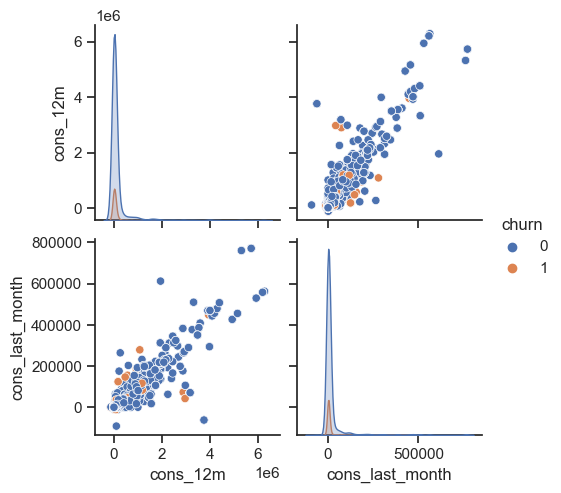

In [120]:
test_regressão = df[['cons_12m', 'cons_last_month','churn']]
teste = test_regressão['cons_12m'].idxmax()
df_without_high_cons = test_regressão.drop(teste)

sns.set(style="ticks")
sns.pairplot(df_without_high_cons, hue="churn")
plt.show()

c:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


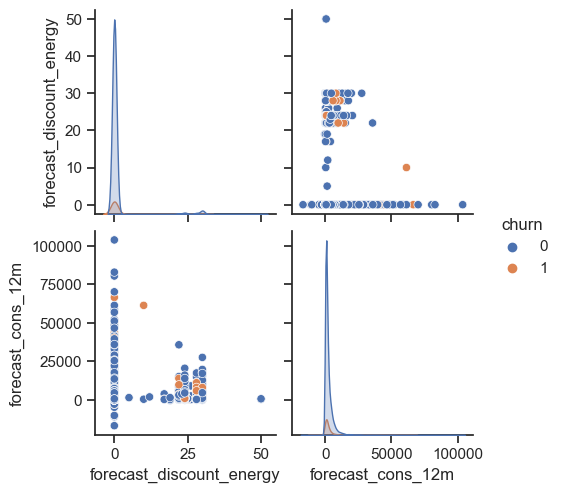

In [121]:
test_regressão = df[['forecast_discount_energy', 'forecast_cons_12m','churn']]


sns.set(style="ticks")
sns.pairplot(test_regressão, hue="churn")
plt.show()

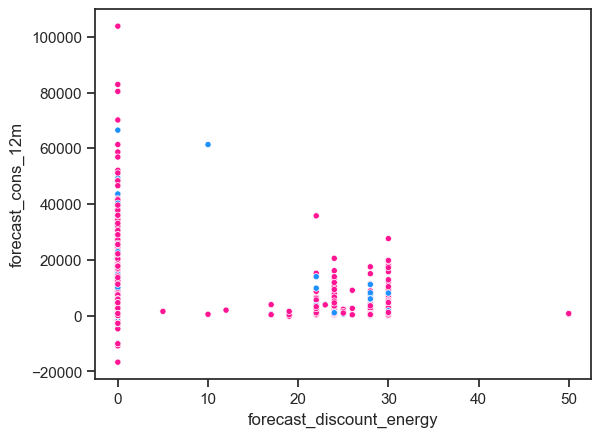

In [122]:
# Creating the scatter plot
colors = df['churn'].map({1: 'dodgerblue', 0: 'deeppink'})
ax = df.plot.scatter(x='forecast_discount_energy', y='forecast_cons_12m', c = colors, edgecolors='w', linewidth=0.5)

# Showing the chart
plt.show()

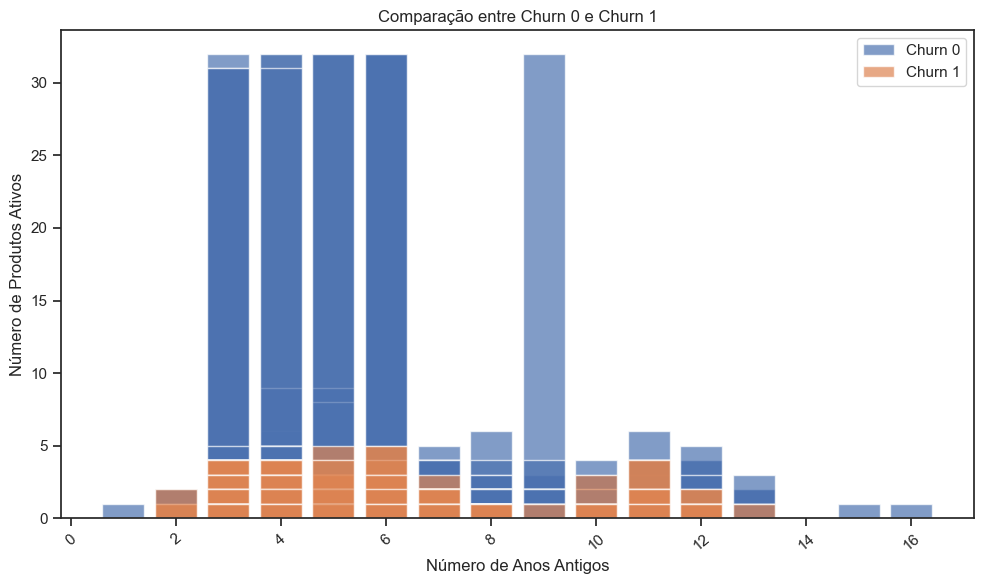

In [123]:
churn0= df[df['churn'] == 0]
churn1= df[df['churn'] == 1]
plt.figure(figsize=(10, 6))
plt.bar(churn0['num_years_antig'], churn0['nb_prod_act'], label='Churn 0', alpha=0.7)
plt.bar(churn1['num_years_antig'], churn1['nb_prod_act'], label='Churn 1', alpha=0.7)
plt.xlabel('Número de Anos Antigos')
plt.ylabel('Número de Produtos Ativos')
plt.title('Comparação entre Churn 0 e Churn 1')
plt.xticks(rotation=40)
plt.legend()

plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x218e7266290>,
 [Text(-1.0470449880908288, 0.33718955042212767, '0'),
  Text(1.0470449565208602, -0.3371896484535525, '1')],
 [Text(-0.5711154480495428, 0.18392157295752415, '90.1%'),
  Text(0.5711154308295601, -0.18392162642921042, '9.9%')])

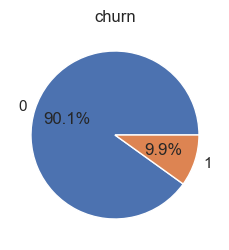

In [124]:
sizes = df['churn'].value_counts(sort = True)
labels = np.unique(df.churn)
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Feature Engineering

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16023 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16023 non-null  object        
 1   activity_new              16023 non-null  object        
 2   channel_sales             16023 non-null  object        
 3   cons_12m                  16023 non-null  int64         
 4   cons_gas_12m              16023 non-null  int64         
 5   cons_last_month           16023 non-null  int64         
 6   date_activ                16023 non-null  datetime64[ns]
 7   date_end                  16023 non-null  datetime64[ns]
 8   date_modif_prod           16023 non-null  datetime64[ns]
 9   date_renewal              16023 non-null  datetime64[ns]
 10  forecast_cons_12m         16023 non-null  float64       
 11  forecast_cons_year        16023 non-null  int64         
 12  forecast_discount_energ

In [126]:
df = df[~df.applymap(lambda x: isinstance(x, (int, float)) and x < 0).any(axis=1)]


In [127]:
df.loc[:, 'contract_tenure'] = (df['date_end'] - df['date_activ']).apply(lambda x: x.days)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_23928\1361488024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'contract_tenure'] = (df['date_end'] - df['date_activ']).apply(lambda x: x.days)


In [128]:
df['renovation_tenure'] = (df['date_renewal'] - df['date_modif_prod']).apply(lambda x: x.days)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_23928\2618130037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovation_tenure'] = (df['date_renewal'] - df['date_modif_prod']).apply(lambda x: x.days)


In [129]:
df['contract_tenure_year'] = df['contract_tenure'].apply(lambda x: int(np.round(x / 365)))

C:\Users\Inteli\AppData\Local\Temp\ipykernel_23928\1645455172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contract_tenure_year'] = df['contract_tenure'].apply(lambda x: int(np.round(x / 365)))


Separate columns into quarters

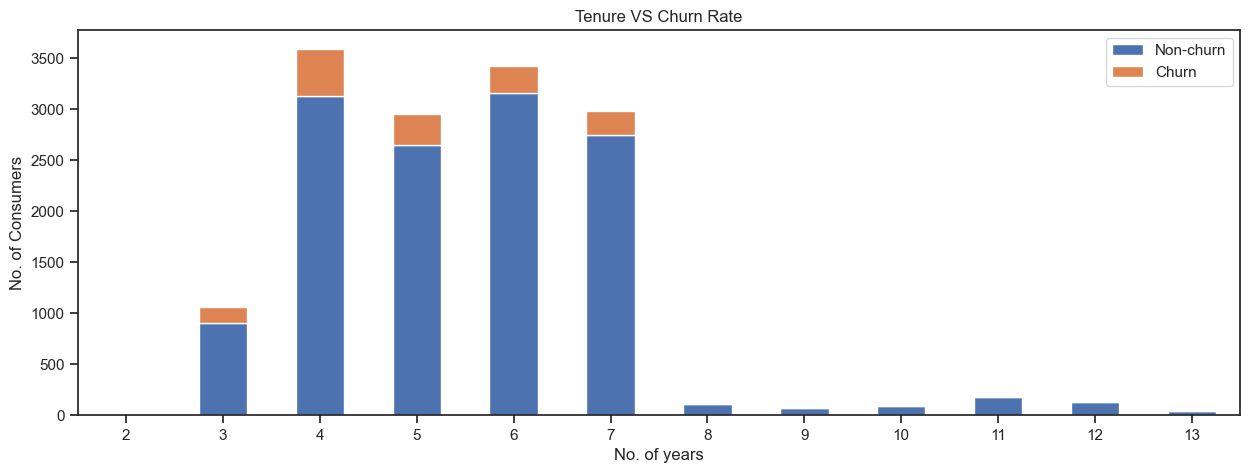

In [130]:
tenure = df[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
tenure.plot(kind="bar",
 figsize=(15,5),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate"),

# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

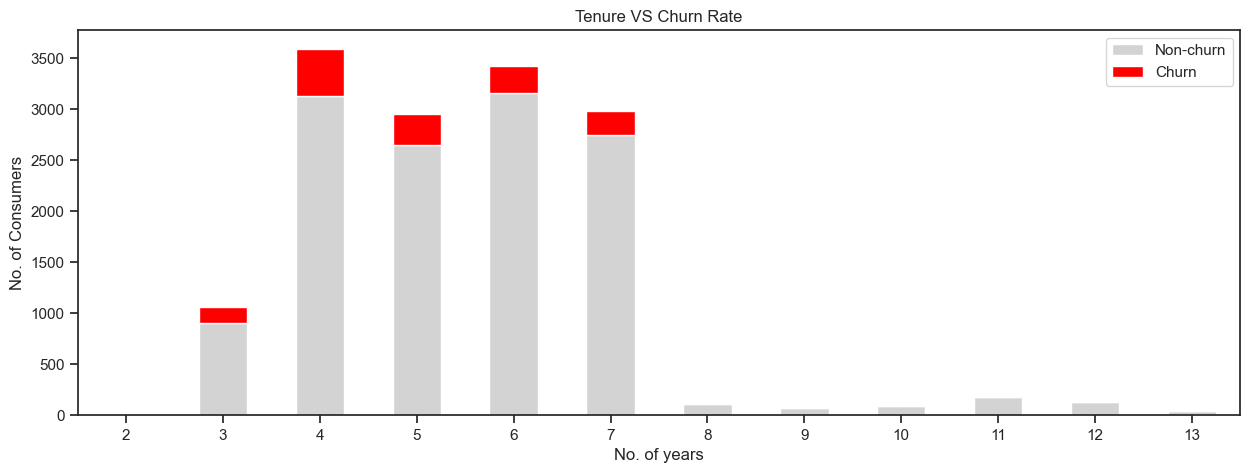

In [131]:
tenure = df[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
custom_colors = ["lightgray", "red"]
tenure.plot(kind="bar",
 figsize=(15,5),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate",
 color=custom_colors)

# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

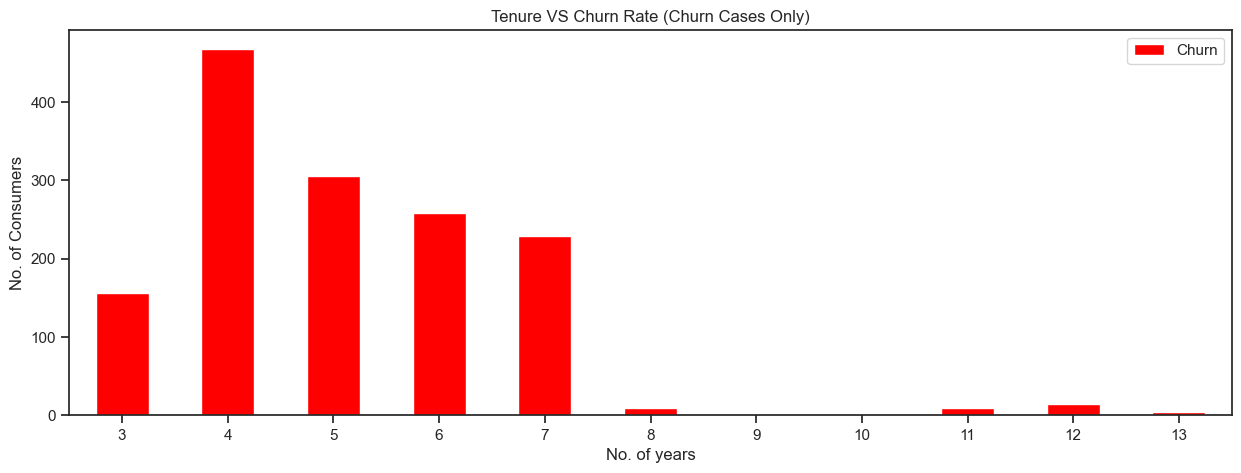

In [132]:
churn_data = df[df["churn"] == 1]
tenure = churn_data[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0) * 100)
tenure.plot(kind="bar",
            figsize=(15, 5),
            stacked=True,
            rot=0,
            title="Tenure VS Churn Rate (Churn Cases Only)",
            color="red")
plt.legend(["Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()


It appears that medium-term contracts have the most churn by far...

Calculating the deviation between last month bill and last 12 months average:

In [133]:
df['bill_dev'] = (df['cons_12m']/12) - df['cons_last_month']

C:\Users\Inteli\AppData\Local\Temp\ipykernel_23928\817011021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bill_dev'] = (df['cons_12m']/12) - df['cons_last_month']


Calculate the ratio of last 12month consumption to next 12 month forecasted consumption:

In [134]:
def handleInf(x):
    if x==float('-inf') or x==float('inf'):
        return 0

In [135]:
df['cons_pattern'] = df['forecast_cons_12m'] / df['cons_12m']
df.cons_pattern = df.cons_pattern.apply(handleInf)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_23928\1339534947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cons_pattern'] = df['forecast_cons_12m'] / df['cons_12m']
C:\Users\Inteli\AppData\Local\Temp\ipykernel_23928\1339534947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cons_pattern = df.cons_pattern.apply(handleInf)


In [136]:
d_price.shape

(241238, 8)

In [137]:
d_price.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,3acc714fbd9b3ccaac3c412cf220e929,01/01/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0
1,3acc714fbd9b3ccaac3c412cf220e929,01/02/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0
2,3acc714fbd9b3ccaac3c412cf220e929,01/03/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0


In [138]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
d_price[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']] = imp_freq.fit_transform(
    d_price[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']])

In [139]:
colunas_para_converter = ['price_p1_fix', 'price_p1_var', 'price_p2_fix', 'price_p2_var', 'price_p3_fix', 'price_p3_var']
d_price[colunas_para_converter] = d_price[colunas_para_converter].astype(float)

In [140]:
def calculate_consumption(fix_price, var_price):
    if var_price != 0:
        return fix_price / var_price
    else:
        return 0

d_price["consumption_p1"] = d_price.apply(lambda row: calculate_consumption(row["price_p1_fix"], row["price_p1_var"]), axis=1)
d_price["consumption_p2"] = d_price.apply(lambda row: calculate_consumption(row["price_p2_fix"], row["price_p2_var"]), axis=1)
d_price["consumption_p3"] = d_price.apply(lambda row: calculate_consumption(row["price_p3_fix"], row["price_p3_var"]), axis=1)
#d_price = d_price.drop(['price_p1_fix', 'price_p1_var', 'price_p2_fix', 'price_p2_var', 'price_p3_fix', 'price_p3_var'], axis=1)

In [141]:
d_price.isnull().sum()

id                0
price_date        0
price_p1_var      0
price_p2_var      0
price_p3_var      0
price_p1_fix      0
price_p2_fix      0
price_p3_fix      0
consumption_p1    0
consumption_p2    0
consumption_p3    0
dtype: int64

In [142]:
d_price.groupby('id')[['consumption_p1', 'consumption_p2', 'consumption_p3']].mean()

,consumption_p1,consumption_p2,consumption_p3
id,,,
0002203ffbb812588b632b9e628cc38d,327.659237,235.363953,222.602013
000381698491fec6983d55828fe5ada6,580.977007,402.293909,126.270167
0004351ebdd665e6ee664792efc4fd13,303.191801,0.000000,0.000000
000861c9aa2a0784b8d83f8b5b95d010,326.869860,234.344025,216.873292
0010bcc39e42b3c2131ed2ce55246e3c,254.036436,0.000000,0.000000
...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,304.289727,220.146801,208.531834
fffac626da707b1b5ab11e8431a4d0a2,301.218347,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,267.579560,192.318306,177.097052


In [143]:
df = pd.merge(d_price, df, on=['id'])

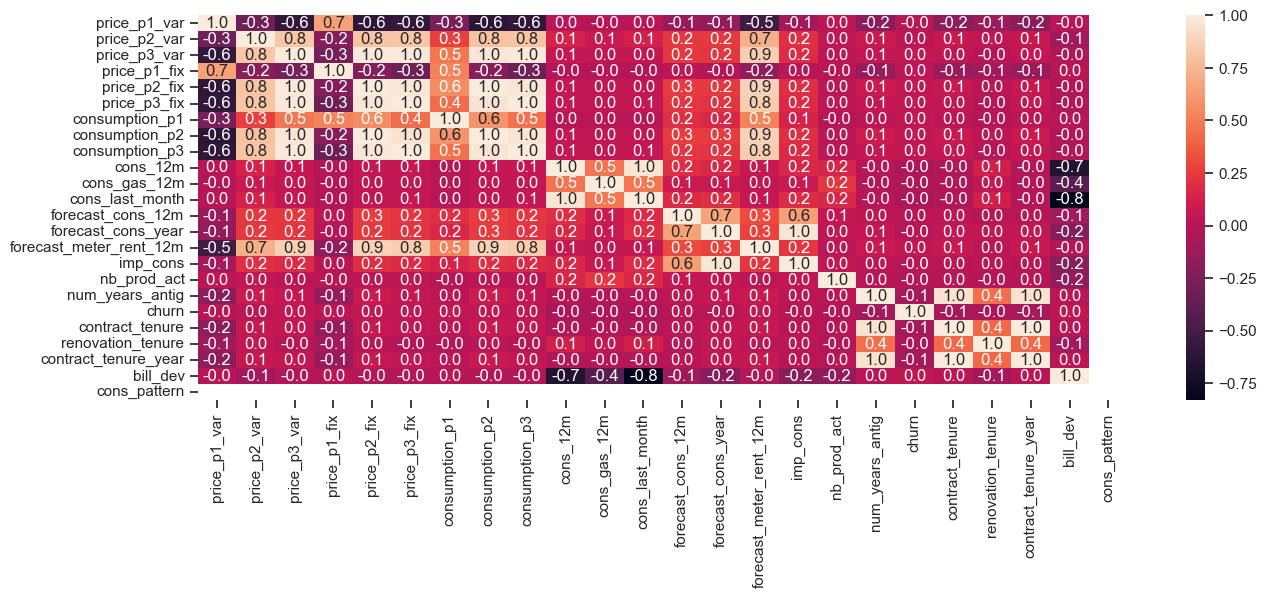

In [144]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15,5))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".1f");

In [145]:
df.dtypes

id                                  object
price_date                          object
price_p1_var                       float64
price_p2_var                       float64
price_p3_var                       float64
price_p1_fix                       float64
price_p2_fix                       float64
price_p3_fix                       float64
consumption_p1                     float64
consumption_p2                     float64
consumption_p3                     float64
activity_new                        object
channel_sales                       object
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy            object
forecast_me

In [146]:
df = df.drop_duplicates(subset='id', keep='first')
df

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,...,net_margin,num_years_antig,origin_up,pow_max,churn,contract_tenure,renovation_tenure,contract_tenure_year,bill_dev,cons_pattern
0,038af19179925da21a25619c5a24b745,01/01/2021,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,292.447701,0.000000,...,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,1096,46,3,-332.000000,NaN
12,31f2ce549924679a3cbb2d128ae9ea43,01/01/2021,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,322.013474,235.403846,...,566.27,3,lxidpiddsbxsbosboudacockeimpuepw,50.0,0,1096,32,3,3423.166667,NaN
24,48f3e6e86f7a8656b2c6b6ce2763055e,01/01/2021,0.144431,0.000000,0.000000,44.266931,0.000000,0.000000,306.491897,0.000000,...,270.68,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,1088,374,3,336.250000,NaN
36,7363a2ebfbb3148c8ef6d25323e4093a,01/01/2021,0.127710,0.105130,0.073270,40.565969,24.339581,16.226389,317.641292,231.518888,...,224.88,3,ldkssxwpmemidmecebumciepifcamkci,17.25,1,1096,23,3,-101.833333,NaN
48,ef716222bbd97a8bdfcbb831e3575560,01/01/2021,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,292.447701,0.000000,...,41.71,3,ldkssxwpmemidmecebumciepifcamkci,13.856,0,1096,224,3,482.250000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175756,cd622263c26436d1237e94ff05cdd506,01/01/2021,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,292.447701,0.000000,...,80.88,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.2,0,2191,1843,6,439.416667,NaN
175768,ed3434c3c1e2056d1a313e2671815e4d,01/01/2021,0.128069,0.105843,0.073773,40.728885,24.437330,16.291555,318.022980,230.882817,...,271.71,3,ldkssxwpmemidmecebumciepifcamkci,17.25,0,1461,26,4,168.750000,NaN
175780,d00da2c0c568614b9937791f681cd7d7,01/01/2021,0.150211,0.000000,0.000000,44.266931,0.000000,0.000000,294.698332,0.000000,...,94.02,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,1096,1229,3,-3155.750000,NaN
175792,045f94f0b7f538a8d8fae11080abb5da,01/01/2021,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,292.447701,0.000000,...,60.45,3,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,1096,46,3,-1687.916667,NaN


In [147]:
d_price.isnull().sum()

id                0
price_date        0
price_p1_var      0
price_p2_var      0
price_p3_var      0
price_p1_fix      0
price_p2_fix      0
price_p3_fix      0
consumption_p1    0
consumption_p2    0
consumption_p3    0
dtype: int64

# Standardizing the units

Apllying the PCA

In [148]:
id_column = df[['id']]


In [149]:
categorical = ['id','channel_sales','activity_new','origin_up','has_gas']
df_categorical = df[categorical]
churnn = ['churn', 'id']
df_churn = df[churnn]

colunas_preditoras = ['price_p1_var', 'price_p2_var', 'price_p3_var',
                      'price_p1_fix', 'price_p2_fix', 'price_p3_fix',
                      'consumption_p1', 'consumption_p2', 'consumption_p3',
                      'cons_12m', 'cons_gas_12m', 'cons_last_month',
                      'forecast_cons_12m', 'forecast_cons_year',
                      'forecast_discount_energy', 'forecast_meter_rent_12m',
                      'forecast_price_energy_p1', 'forecast_price_energy_p2',
                      'forecast_price_pow_p1', 'imp_cons',
                      'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
                      'net_margin', 'num_years_antig', 'pow_max']

X = df[colunas_preditoras]

In [150]:
churn = pd.DataFrame()
churn['churn'] = df['churn']

In [151]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

columns = X.columns  

In [152]:
X_scaled_df = pd.DataFrame(X_scaled, columns=columns)
X_scaled_df

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,cons_12m,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
0,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,-0.271651,...,0.272022,-1.021720,0.264002,-0.178814,-0.149120,-0.148998,-0.411374,-0.440762,-1.238426,-0.349430
1,-0.832525,1.013083,1.223222,-0.494604,1.221956,1.290194,0.531819,1.243541,1.319670,-0.206537,...,-0.878484,1.005997,-0.565311,-0.445472,1.413110,1.413301,-0.411374,1.223106,-1.238426,2.220677
2,0.023823,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,0.181194,-0.780470,-0.781123,-0.235892,...,0.193946,-1.021720,0.264002,0.255994,-0.260035,-0.259918,0.999848,0.265768,-1.238426,-0.545540
3,-0.752064,1.047331,1.271995,-0.494604,1.221956,1.290194,0.433053,1.210138,1.269952,-0.246916,...,-0.925696,0.982379,-0.565311,-0.013365,0.062809,0.062940,-0.411374,0.117434,-1.238426,-0.066578
4,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,-0.267812,...,0.342596,-1.021720,0.264002,-0.445472,-0.099604,-0.099480,-0.411374,-0.475805,-1.238426,-0.303615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,-0.268705,...,0.342596,-1.021720,0.264002,-0.445472,-0.005523,-0.005395,-0.411374,-0.348944,0.624040,-0.349430
14658,-0.735406,1.061405,1.286143,-0.458805,1.230016,1.298527,0.441676,1.204669,1.264149,-0.239778,...,-0.894833,1.022803,-0.565311,0.031068,-0.927511,-0.927424,-0.411374,0.269104,-1.238426,-0.066578
14659,0.292026,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.085217,-0.780470,-0.781123,-0.215453,...,0.309612,-1.021720,0.264002,0.076315,-0.376893,-0.376781,-0.411374,-0.306387,-1.238426,-0.545540
14660,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,-0.136073,...,0.224810,-1.021720,0.264002,-0.445472,-0.376893,-0.376781,-0.411374,-0.415111,-1.238426,-0.545540


In [153]:
id_column = id_column.set_index(X_scaled_df.index)  # Define o índice de id_column para corresponder a X_scaled_df
X_scaled_df = pd.concat([id_column, X_scaled_df], axis=1)
X_scaled_df


,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
0,038af19179925da21a25619c5a24b745,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,0.272022,-1.021720,0.264002,-0.178814,-0.149120,-0.148998,-0.411374,-0.440762,-1.238426,-0.349430
1,31f2ce549924679a3cbb2d128ae9ea43,-0.832525,1.013083,1.223222,-0.494604,1.221956,1.290194,0.531819,1.243541,1.319670,...,-0.878484,1.005997,-0.565311,-0.445472,1.413110,1.413301,-0.411374,1.223106,-1.238426,2.220677
2,48f3e6e86f7a8656b2c6b6ce2763055e,0.023823,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,0.181194,-0.780470,-0.781123,...,0.193946,-1.021720,0.264002,0.255994,-0.260035,-0.259918,0.999848,0.265768,-1.238426,-0.545540
3,7363a2ebfbb3148c8ef6d25323e4093a,-0.752064,1.047331,1.271995,-0.494604,1.221956,1.290194,0.433053,1.210138,1.269952,...,-0.925696,0.982379,-0.565311,-0.013365,0.062809,0.062940,-0.411374,0.117434,-1.238426,-0.066578
4,ef716222bbd97a8bdfcbb831e3575560,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,0.342596,-1.021720,0.264002,-0.445472,-0.099604,-0.099480,-0.411374,-0.475805,-1.238426,-0.303615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,cd622263c26436d1237e94ff05cdd506,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,0.342596,-1.021720,0.264002,-0.445472,-0.005523,-0.005395,-0.411374,-0.348944,0.624040,-0.349430
14658,ed3434c3c1e2056d1a313e2671815e4d,-0.735406,1.061405,1.286143,-0.458805,1.230016,1.298527,0.441676,1.204669,1.264149,...,-0.894833,1.022803,-0.565311,0.031068,-0.927511,-0.927424,-0.411374,0.269104,-1.238426,-0.066578
14659,d00da2c0c568614b9937791f681cd7d7,0.292026,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.085217,-0.780470,-0.781123,...,0.309612,-1.021720,0.264002,0.076315,-0.376893,-0.376781,-0.411374,-0.306387,-1.238426,-0.545540
14660,045f94f0b7f538a8d8fae11080abb5da,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,0.224810,-1.021720,0.264002,-0.445472,-0.376893,-0.376781,-0.411374,-0.415111,-1.238426,-0.545540


In [154]:
df = X_scaled_df
df

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
0,038af19179925da21a25619c5a24b745,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,0.272022,-1.021720,0.264002,-0.178814,-0.149120,-0.148998,-0.411374,-0.440762,-1.238426,-0.349430
1,31f2ce549924679a3cbb2d128ae9ea43,-0.832525,1.013083,1.223222,-0.494604,1.221956,1.290194,0.531819,1.243541,1.319670,...,-0.878484,1.005997,-0.565311,-0.445472,1.413110,1.413301,-0.411374,1.223106,-1.238426,2.220677
2,48f3e6e86f7a8656b2c6b6ce2763055e,0.023823,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,0.181194,-0.780470,-0.781123,...,0.193946,-1.021720,0.264002,0.255994,-0.260035,-0.259918,0.999848,0.265768,-1.238426,-0.545540
3,7363a2ebfbb3148c8ef6d25323e4093a,-0.752064,1.047331,1.271995,-0.494604,1.221956,1.290194,0.433053,1.210138,1.269952,...,-0.925696,0.982379,-0.565311,-0.013365,0.062809,0.062940,-0.411374,0.117434,-1.238426,-0.066578
4,ef716222bbd97a8bdfcbb831e3575560,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,0.342596,-1.021720,0.264002,-0.445472,-0.099604,-0.099480,-0.411374,-0.475805,-1.238426,-0.303615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,cd622263c26436d1237e94ff05cdd506,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,0.342596,-1.021720,0.264002,-0.445472,-0.005523,-0.005395,-0.411374,-0.348944,0.624040,-0.349430
14658,ed3434c3c1e2056d1a313e2671815e4d,-0.735406,1.061405,1.286143,-0.458805,1.230016,1.298527,0.441676,1.204669,1.264149,...,-0.894833,1.022803,-0.565311,0.031068,-0.927511,-0.927424,-0.411374,0.269104,-1.238426,-0.066578
14659,d00da2c0c568614b9937791f681cd7d7,0.292026,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.085217,-0.780470,-0.781123,...,0.309612,-1.021720,0.264002,0.076315,-0.376893,-0.376781,-0.411374,-0.306387,-1.238426,-0.545540
14660,045f94f0b7f538a8d8fae11080abb5da,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,0.224810,-1.021720,0.264002,-0.445472,-0.376893,-0.376781,-0.411374,-0.415111,-1.238426,-0.545540


In [155]:
df = pd.merge(df, df_categorical, on = 'id')
df

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,channel_sales,activity_new,origin_up,has_gas
0,038af19179925da21a25619c5a24b745,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.149120,-0.148998,-0.411374,-0.440762,-1.238426,-0.349430,foosdfpfkusacimwkcsosbicdxkicaua,wxemiwkumpibllwklfbcooafckufkdlm,ldkssxwpmemidmecebumciepifcamkci,f
1,31f2ce549924679a3cbb2d128ae9ea43,-0.832525,1.013083,1.223222,-0.494604,1.221956,1.290194,0.531819,1.243541,1.319670,...,1.413110,1.413301,-0.411374,1.223106,-1.238426,2.220677,foosdfpfkusacimwkcsosbicdxkicaua,ppcxfxbffsxaakxamcdpexdoxulfwwae,lxidpiddsbxsbosboudacockeimpuepw,f
2,48f3e6e86f7a8656b2c6b6ce2763055e,0.023823,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,0.181194,-0.780470,-0.781123,...,-0.260035,-0.259918,0.999848,0.265768,-1.238426,-0.545540,foosdfpfkusacimwkcsosbicdxkicaua,new activity,lxidpiddsbxsbosboudacockeimpuepw,t
3,7363a2ebfbb3148c8ef6d25323e4093a,-0.752064,1.047331,1.271995,-0.494604,1.221956,1.290194,0.433053,1.210138,1.269952,...,0.062809,0.062940,-0.411374,0.117434,-1.238426,-0.066578,foosdfpfkusacimwkcsosbicdxkicaua,oclfuccbxapuklpeowbabcpawcbwxesk,ldkssxwpmemidmecebumciepifcamkci,f
4,ef716222bbd97a8bdfcbb831e3575560,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.099604,-0.099480,-0.411374,-0.475805,-1.238426,-0.303615,foosdfpfkusacimwkcsosbicdxkicaua,new activity,ldkssxwpmemidmecebumciepifcamkci,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,cd622263c26436d1237e94ff05cdd506,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.005523,-0.005395,-0.411374,-0.348944,0.624040,-0.349430,new channel,new activity,kamkkxfxxuwbdslkwifmmcsiusiuosws,f
14658,ed3434c3c1e2056d1a313e2671815e4d,-0.735406,1.061405,1.286143,-0.458805,1.230016,1.298527,0.441676,1.204669,1.264149,...,-0.927511,-0.927424,-0.411374,0.269104,-1.238426,-0.066578,ewpakwlliwisiwduibdlfmalxowmwpci,new activity,ldkssxwpmemidmecebumciepifcamkci,f
14659,d00da2c0c568614b9937791f681cd7d7,0.292026,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.085217,-0.780470,-0.781123,...,-0.376893,-0.376781,-0.411374,-0.306387,-1.238426,-0.545540,foosdfpfkusacimwkcsosbicdxkicaua,new activity,lxidpiddsbxsbosboudacockeimpuepw,f
14660,045f94f0b7f538a8d8fae11080abb5da,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.376893,-0.376781,-0.411374,-0.415111,-1.238426,-0.545540,foosdfpfkusacimwkcsosbicdxkicaua,new activity,lxidpiddsbxsbosboudacockeimpuepw,f


In [156]:

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['channel_sales', 'activity_new', 'origin_up']
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = onehot_encoder.fit_transform(df[categorical_columns])
df = pd.concat([df.drop(categorical_columns, axis=1), df], axis=1)
df['has_gas'] = df['has_gas'].replace( {'f':0, 't':1} )
df

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,channel_sales,activity_new,origin_up,has_gas
0,038af19179925da21a25619c5a24b745,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.149120,-0.148998,-0.411374,-0.440762,-1.238426,-0.349430,3,372,2,0
1,31f2ce549924679a3cbb2d128ae9ea43,-0.832525,1.013083,1.223222,-0.494604,1.221956,1.290194,0.531819,1.243541,1.319670,...,1.413110,1.413301,-0.411374,1.223106,-1.238426,2.220677,3,297,3,0
2,48f3e6e86f7a8656b2c6b6ce2763055e,0.023823,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,0.181194,-0.780470,-0.781123,...,-0.260035,-0.259918,0.999848,0.265768,-1.238426,-0.545540,3,255,3,1
3,7363a2ebfbb3148c8ef6d25323e4093a,-0.752064,1.047331,1.271995,-0.494604,1.221956,1.290194,0.433053,1.210138,1.269952,...,0.062809,0.062940,-0.411374,0.117434,-1.238426,-0.066578,3,257,2,0
4,ef716222bbd97a8bdfcbb831e3575560,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.099604,-0.099480,-0.411374,-0.475805,-1.238426,-0.303615,3,255,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,cd622263c26436d1237e94ff05cdd506,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.005523,-0.005395,-0.411374,-0.348944,0.624040,-0.349430,5,255,1,0
14658,ed3434c3c1e2056d1a313e2671815e4d,-0.735406,1.061405,1.286143,-0.458805,1.230016,1.298527,0.441676,1.204669,1.264149,...,-0.927511,-0.927424,-0.411374,0.269104,-1.238426,-0.066578,1,255,2,0
14659,d00da2c0c568614b9937791f681cd7d7,0.292026,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.085217,-0.780470,-0.781123,...,-0.376893,-0.376781,-0.411374,-0.306387,-1.238426,-0.545540,3,255,3,0
14660,045f94f0b7f538a8d8fae11080abb5da,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.376893,-0.376781,-0.411374,-0.415111,-1.238426,-0.545540,3,255,3,0


In [157]:
df = df.reset_index(drop=True)

In [158]:
df.columns

Index(['id', 'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'consumption_p1', 'consumption_p2',
       'consumption_p3', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'channel_sales',
       'activity_new', 'origin_up', 'has_gas'],
      dtype='object')

In [159]:
df = pd.merge(df, df_churn, on = 'id')
df

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,channel_sales,activity_new,origin_up,has_gas,churn
0,038af19179925da21a25619c5a24b745,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.148998,-0.411374,-0.440762,-1.238426,-0.349430,3,372,2,0,0
1,31f2ce549924679a3cbb2d128ae9ea43,-0.832525,1.013083,1.223222,-0.494604,1.221956,1.290194,0.531819,1.243541,1.319670,...,1.413301,-0.411374,1.223106,-1.238426,2.220677,3,297,3,0,0
2,48f3e6e86f7a8656b2c6b6ce2763055e,0.023823,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,0.181194,-0.780470,-0.781123,...,-0.259918,0.999848,0.265768,-1.238426,-0.545540,3,255,3,1,0
3,7363a2ebfbb3148c8ef6d25323e4093a,-0.752064,1.047331,1.271995,-0.494604,1.221956,1.290194,0.433053,1.210138,1.269952,...,0.062940,-0.411374,0.117434,-1.238426,-0.066578,3,257,2,0,1
4,ef716222bbd97a8bdfcbb831e3575560,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.099480,-0.411374,-0.475805,-1.238426,-0.303615,3,255,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,cd622263c26436d1237e94ff05cdd506,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.005395,-0.411374,-0.348944,0.624040,-0.349430,5,255,1,0,0
14658,ed3434c3c1e2056d1a313e2671815e4d,-0.735406,1.061405,1.286143,-0.458805,1.230016,1.298527,0.441676,1.204669,1.264149,...,-0.927424,-0.411374,0.269104,-1.238426,-0.066578,1,255,2,0,0
14659,d00da2c0c568614b9937791f681cd7d7,0.292026,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.085217,-0.780470,-0.781123,...,-0.376781,-0.411374,-0.306387,-1.238426,-0.545540,3,255,3,0,0
14660,045f94f0b7f538a8d8fae11080abb5da,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.376781,-0.411374,-0.415111,-1.238426,-0.545540,3,255,3,0,0


In [160]:
df.loc[df['churn'] == 1, ['price_p1_fix', 'price_p2_fix', 'price_p3_fix', 'price_p1_var', 'price_p2_var', 'price_p3_var']] *= 0.80
df

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,channel_sales,activity_new,origin_up,has_gas,churn
0,038af19179925da21a25619c5a24b745,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.148998,-0.411374,-0.440762,-1.238426,-0.349430,3,372,2,0,0
1,31f2ce549924679a3cbb2d128ae9ea43,-0.832525,1.013083,1.223222,-0.494604,1.221956,1.290194,0.531819,1.243541,1.319670,...,1.413301,-0.411374,1.223106,-1.238426,2.220677,3,297,3,0,0
2,48f3e6e86f7a8656b2c6b6ce2763055e,0.023823,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,0.181194,-0.780470,-0.781123,...,-0.259918,0.999848,0.265768,-1.238426,-0.545540,3,255,3,1,0
3,7363a2ebfbb3148c8ef6d25323e4093a,-0.601651,0.837865,1.017596,-0.395683,0.977565,1.032155,0.433053,1.210138,1.269952,...,0.062940,-0.411374,0.117434,-1.238426,-0.066578,3,257,2,0,1
4,ef716222bbd97a8bdfcbb831e3575560,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.099480,-0.411374,-0.475805,-1.238426,-0.303615,3,255,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,cd622263c26436d1237e94ff05cdd506,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.005395,-0.411374,-0.348944,0.624040,-0.349430,5,255,1,0,0
14658,ed3434c3c1e2056d1a313e2671815e4d,-0.735406,1.061405,1.286143,-0.458805,1.230016,1.298527,0.441676,1.204669,1.264149,...,-0.927424,-0.411374,0.269104,-1.238426,-0.066578,1,255,2,0,0
14659,d00da2c0c568614b9937791f681cd7d7,0.292026,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.085217,-0.780470,-0.781123,...,-0.376781,-0.411374,-0.306387,-1.238426,-0.545540,3,255,3,0,0
14660,045f94f0b7f538a8d8fae11080abb5da,0.345667,-1.027906,-0.788918,0.318654,-0.784933,-0.784764,-0.136057,-0.780470,-0.781123,...,-0.376781,-0.411374,-0.415111,-1.238426,-0.545540,3,255,3,0,0


In [161]:
# df = df.drop(['cons_pattern'], axis=1)

In [162]:
def transform_negative_to_positive(x):
    if isinstance(x, (int, float)) and x < 0:
        return -x
    return x

df.loc[:, df.select_dtypes(include=[int, float]).columns] = df.select_dtypes(include=[int, float]).applymap(transform_negative_to_positive)
df

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,channel_sales,activity_new,origin_up,has_gas,churn
0,038af19179925da21a25619c5a24b745,0.345667,1.027906,0.788918,0.318654,0.784933,0.784764,0.136057,0.780470,0.781123,...,0.148998,0.411374,0.440762,1.238426,0.349430,3,372,2,0,0
1,31f2ce549924679a3cbb2d128ae9ea43,0.832525,1.013083,1.223222,0.494604,1.221956,1.290194,0.531819,1.243541,1.319670,...,1.413301,0.411374,1.223106,1.238426,2.220677,3,297,3,0,0
2,48f3e6e86f7a8656b2c6b6ce2763055e,0.023823,1.027906,0.788918,0.318654,0.784933,0.784764,0.181194,0.780470,0.781123,...,0.259918,0.999848,0.265768,1.238426,0.545540,3,255,3,1,0
3,7363a2ebfbb3148c8ef6d25323e4093a,0.601651,0.837865,1.017596,0.395683,0.977565,1.032155,0.433053,1.210138,1.269952,...,0.062940,0.411374,0.117434,1.238426,0.066578,3,257,2,0,1
4,ef716222bbd97a8bdfcbb831e3575560,0.345667,1.027906,0.788918,0.318654,0.784933,0.784764,0.136057,0.780470,0.781123,...,0.099480,0.411374,0.475805,1.238426,0.303615,3,255,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,cd622263c26436d1237e94ff05cdd506,0.345667,1.027906,0.788918,0.318654,0.784933,0.784764,0.136057,0.780470,0.781123,...,0.005395,0.411374,0.348944,0.624040,0.349430,5,255,1,0,0
14658,ed3434c3c1e2056d1a313e2671815e4d,0.735406,1.061405,1.286143,0.458805,1.230016,1.298527,0.441676,1.204669,1.264149,...,0.927424,0.411374,0.269104,1.238426,0.066578,1,255,2,0,0
14659,d00da2c0c568614b9937791f681cd7d7,0.292026,1.027906,0.788918,0.318654,0.784933,0.784764,0.085217,0.780470,0.781123,...,0.376781,0.411374,0.306387,1.238426,0.545540,3,255,3,0,0
14660,045f94f0b7f538a8d8fae11080abb5da,0.345667,1.027906,0.788918,0.318654,0.784933,0.784764,0.136057,0.780470,0.781123,...,0.376781,0.411374,0.415111,1.238426,0.545540,3,255,3,0,0


In [163]:
df.columns

Index(['id', 'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix',
       'price_p2_fix', 'price_p3_fix', 'consumption_p1', 'consumption_p2',
       'consumption_p3', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'channel_sales',
       'activity_new', 'origin_up', 'has_gas', 'churn'],
      dtype='object')

In [164]:
df = df.drop('id', axis=1)


In [165]:
# Aplique o PCA
X_scaled_df = df
pca = PCA(n_components=26)  # Defina o número de componentes principais desejados
X_pca = pca.fit_transform(X_scaled_df)
X_pca = pca.transform(X_scaled_df)
df_pca = X_pca
df_pca

array([[-1.60008616e+02, -8.95768736e-01,  6.76964215e-01, ...,
         6.93959749e-02, -1.37458106e-02,  2.85673542e-02],
       [-8.50066311e+01,  9.36541293e-01,  1.56771628e+00, ...,
        -8.45501218e-02,  6.71936622e-02,  6.88245728e-03],
       [-4.30109472e+01, -1.04386437e+00,  7.42295991e-01, ...,
        -9.38075700e-02,  2.16937673e-02,  1.35941991e-02],
       ...,
       [-4.30120130e+01, -1.03289128e+00,  6.46973554e-01, ...,
         2.45852655e-02, -5.71754994e-03,  2.58007572e-02],
       [-4.30114168e+01, -8.32559575e-01,  8.51923109e-01, ...,
         2.12114143e-02,  8.96868692e-04,  2.22564033e-02],
       [-4.30102723e+01, -2.62228484e-01,  7.62782998e-01, ...,
         1.15797579e-02, -5.36976786e-02, -7.72477448e-02]])

In [1]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(15,5))

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance') 
plt.xlabel('Principal Component',labelpad=50)
plt.title('Scree Plot') 
plt.show()

NameError: name 'np' is not defined

# Modeling & Evaluation

# Randon Forest Training

Validação cruzada

Random Forest


In [167]:
# df_scaled = df_scaled.drop(['cons_pattern'], axis=1)

In [186]:
y = churn["churn"]
X = df_pca

In [204]:
# Configure a validação cruzada estratificada com 5 folds
num_folds = 26
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

In [205]:
# Inicialize o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [206]:
smote = SMOTE(random_state=42)


In [207]:
confusion_matrices = []


In [208]:
accuracies = []
roc_auc_scores = []

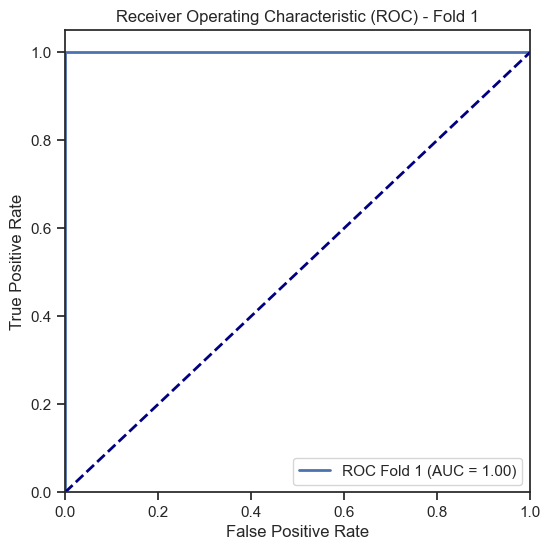

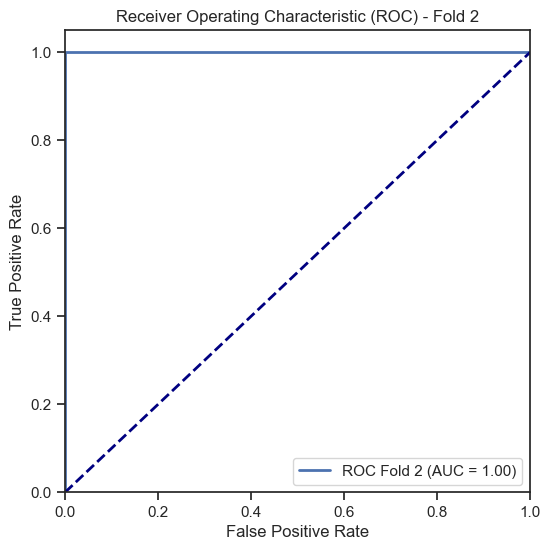

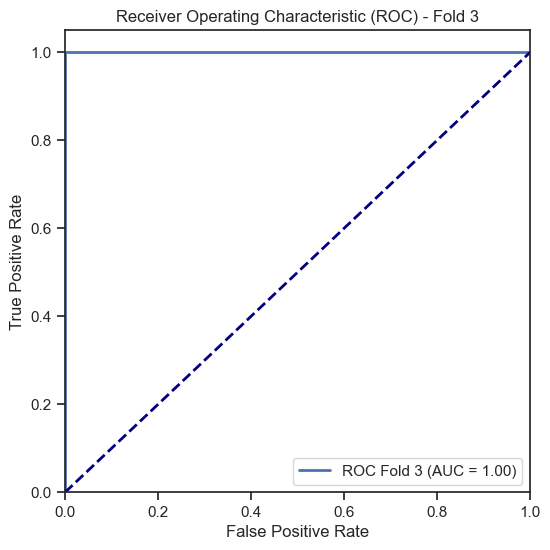

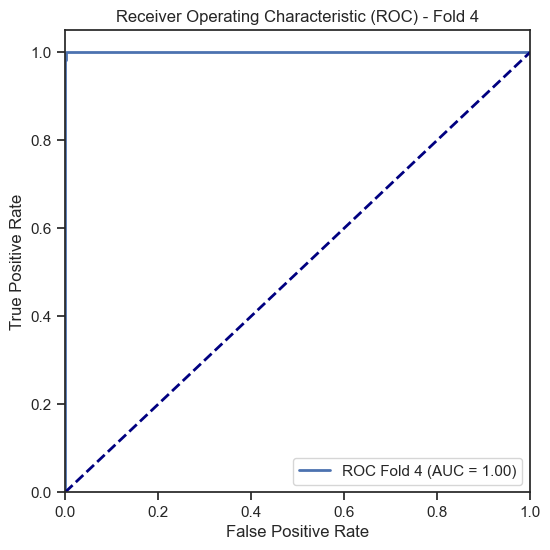

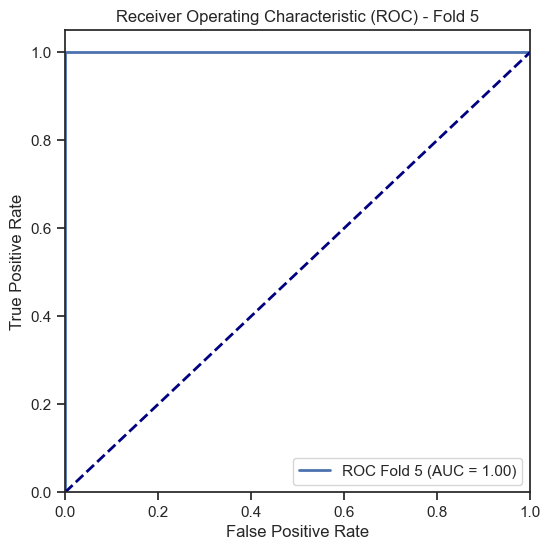

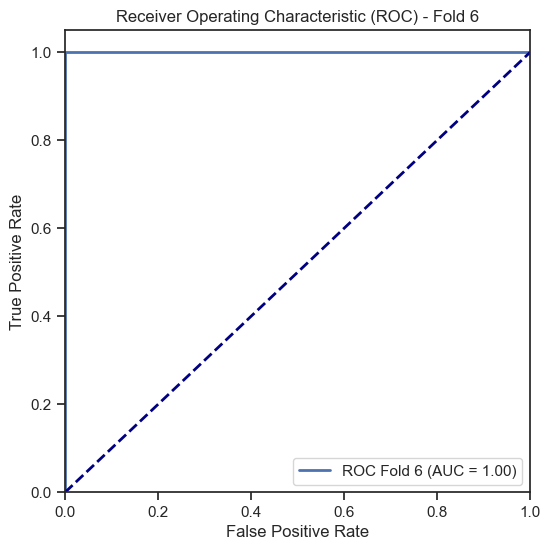

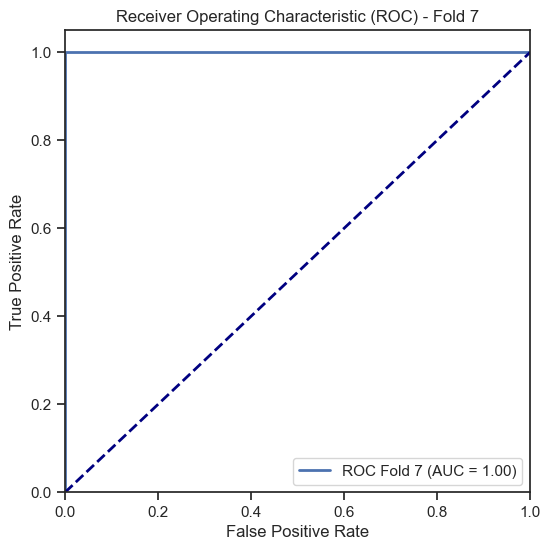

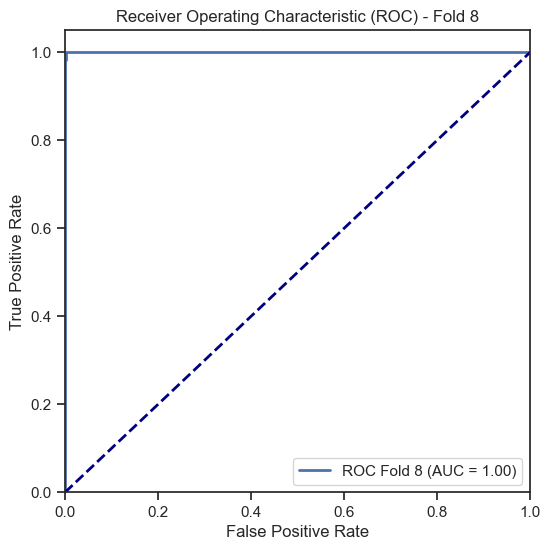

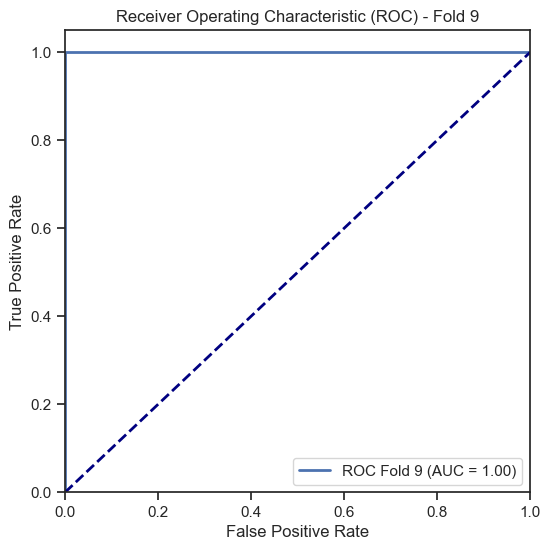

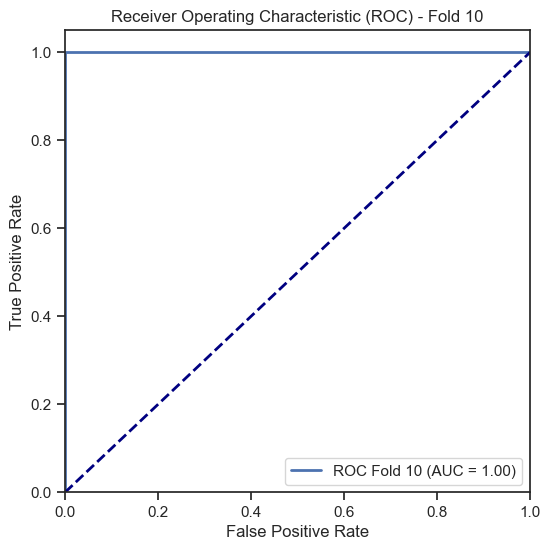

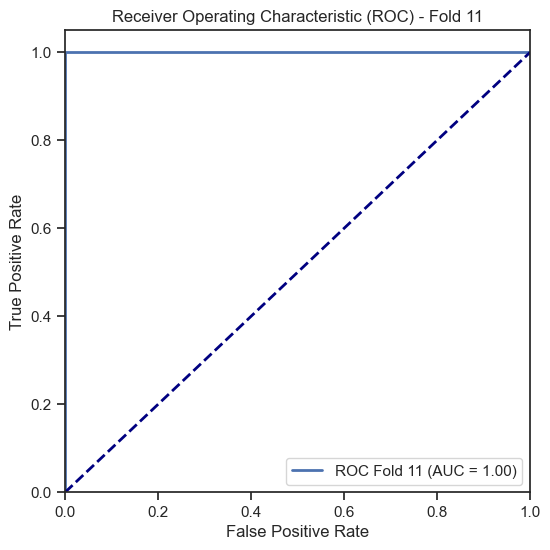

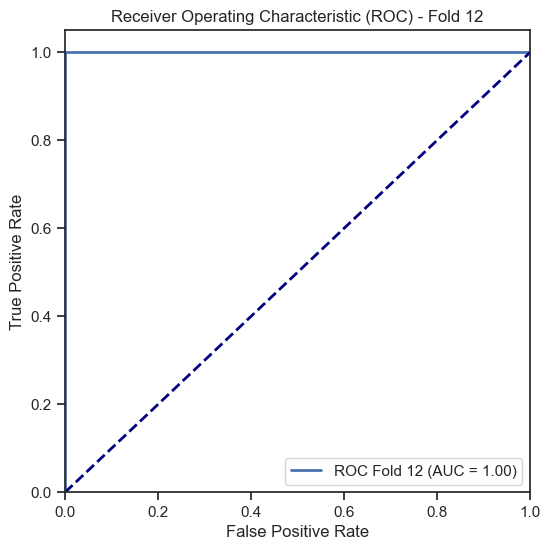

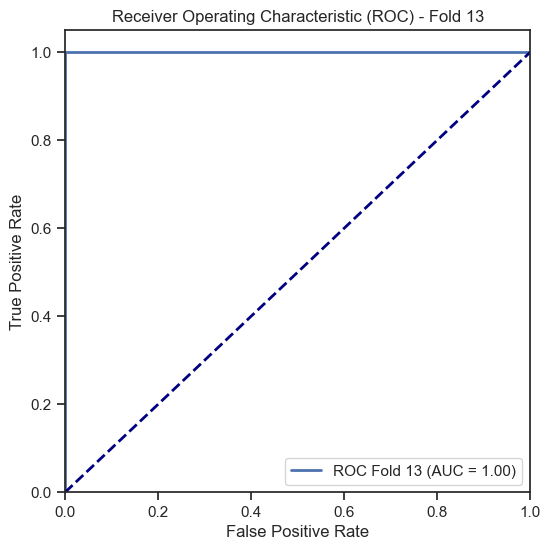

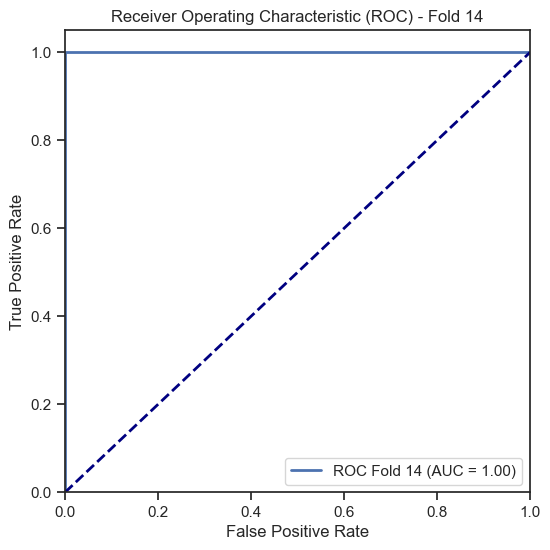

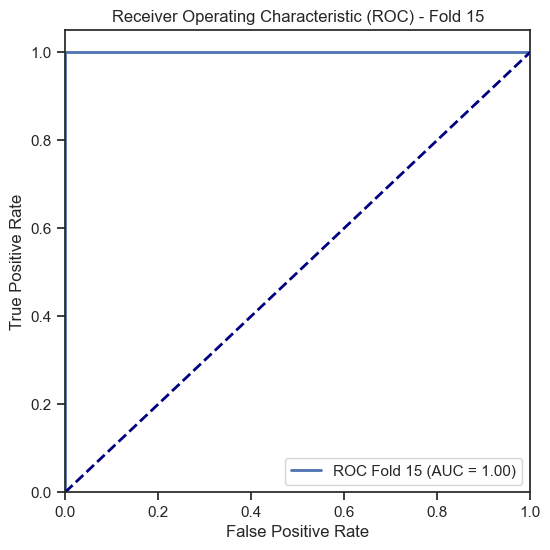

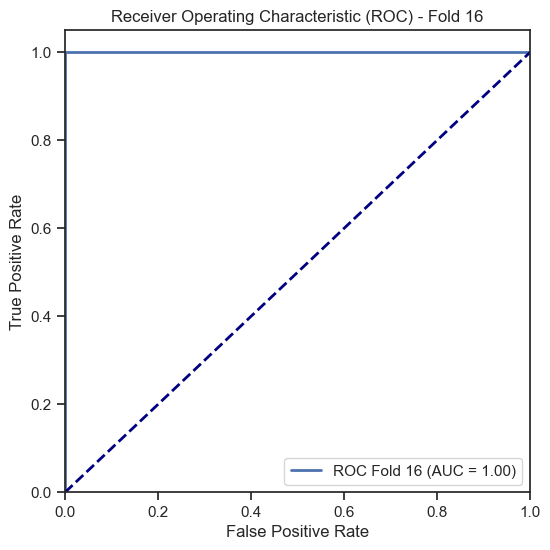

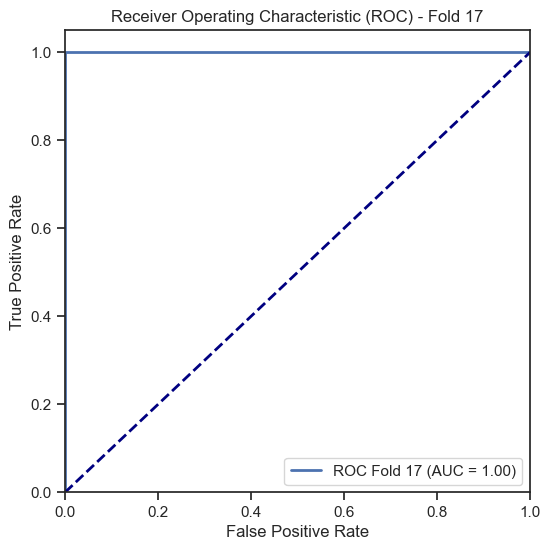

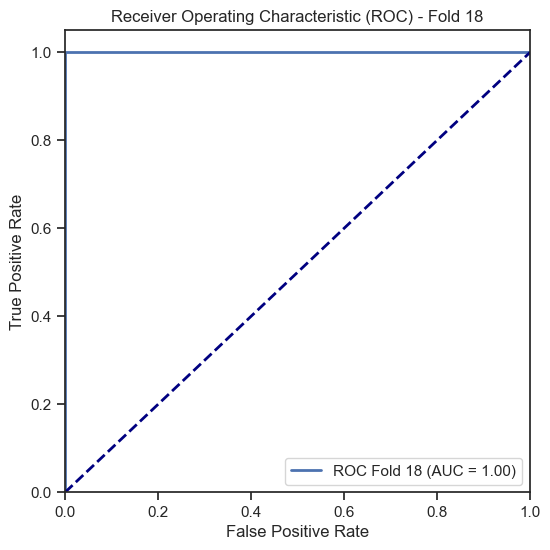

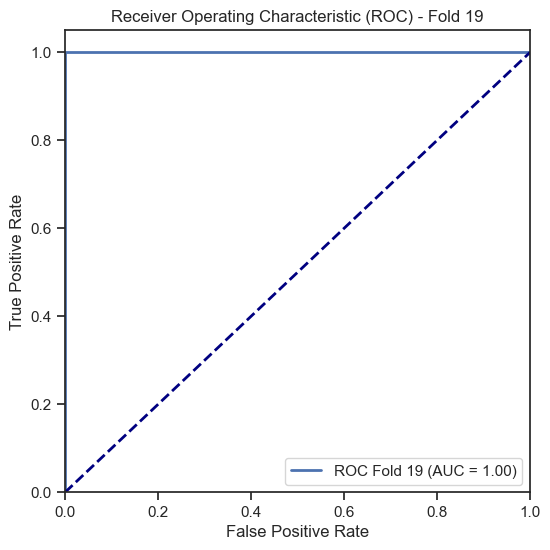

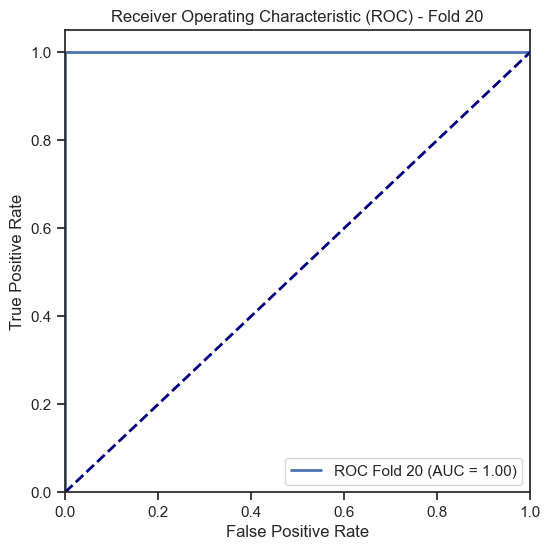

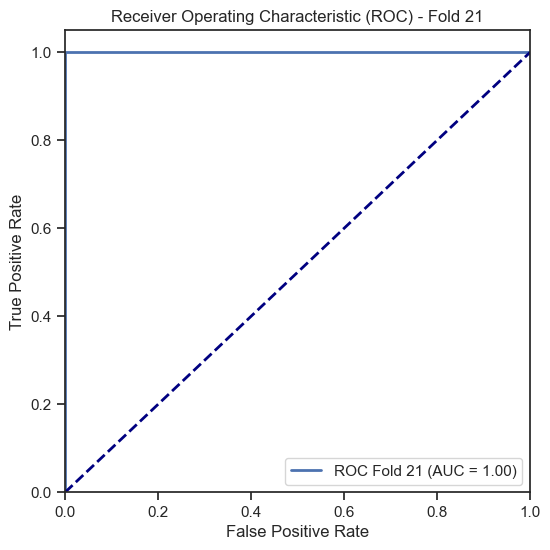

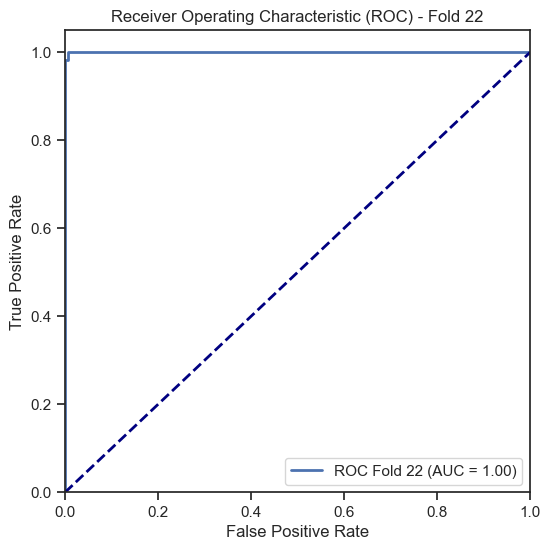

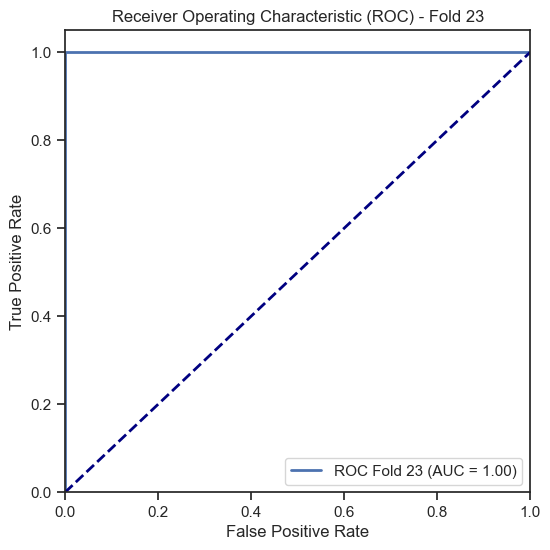

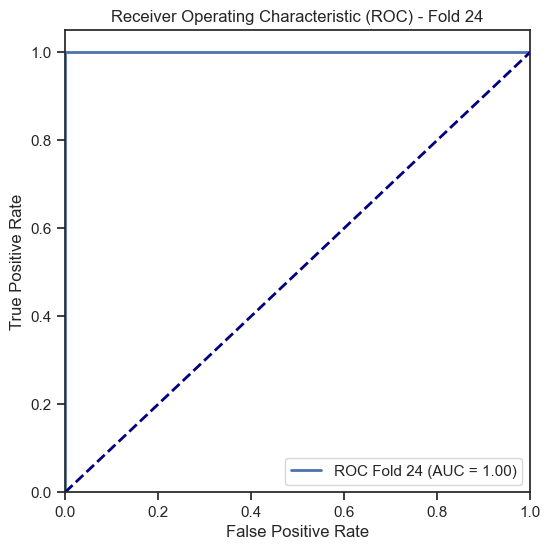

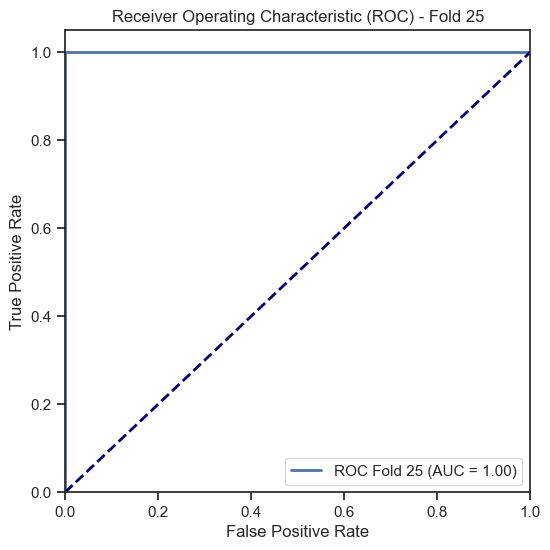

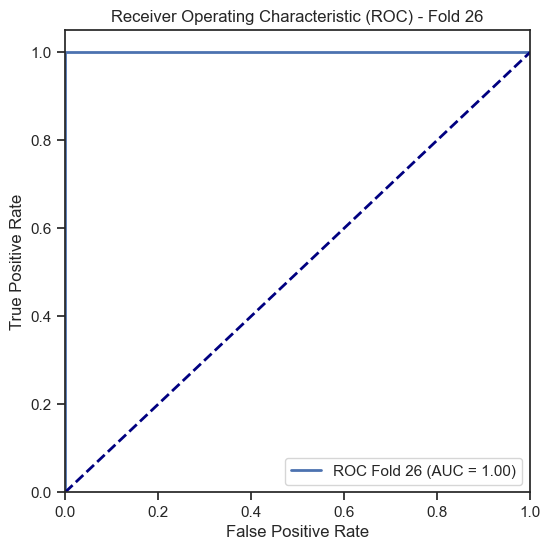

In [209]:
# Itere sobre os folds
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    train_indices = train_index.tolist()
    test_indices = test_index.tolist()

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]  # Corrija a indexação aqui

    # Aplique o SMOTE apenas aos dados de treinamento
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Treine o modelo com os dados de treinamento resampleados
    model.fit(X_train_resampled, y_train_resampled)

    # Faça previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcule a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    
    # Armazene a matriz de confusão
    confusion_matrices.append(cm)

     # Calcule a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calcule a ROC-AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores.append(roc_auc)

    # Plote a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, lw=2, label=f"ROC Fold {fold + 1} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Receiver Operating Characteristic (ROC) - Fold {fold + 1}")
    plt.legend(loc="lower right")
    plt.show()


In [210]:
# Calcule a média das métricas
mean_accuracy = np.mean(accuracies)
mean_roc_auc = np.mean(roc_auc_scores)

In [211]:
print(f"Média da Acurácia: {mean_accuracy:.2f}")
print(f"Média da ROC-AUC: {mean_roc_auc:.2f}")

Média da Acurácia: 1.00
Média da ROC-AUC: 1.00


# Hyperparameters


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
# parametros = {
#     'n_estimators': np.arange(10, 200),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': np.arange(3, 20),
#     'min_samples_split': np.arange(2, 20),
#     'min_samples_leaf': np.arange(1, 20),
#     'bootstrap': [True, False],
#     'class_weight': ['balanced', 'balanced_subsample']
# }


# rf_random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=parametros, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')
# rf_random_search.fit(X_train, y_train)
# best_params = rf_random_search.best_params_
# print("hyperparameters:\n", best_params)

In [ ]:
model = RandomForestClassifier(
    n_estimators=161,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    max_depth=9,
    bootstrap=False,
    random_state=42,
    class_weight= 'balanced_subsample'
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred3 = model.predict(X_train)
class_report = classification_report(y_train, y_pred3)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2636
           1       1.00      1.00      1.00       296

    accuracy                           1.00      2932
   macro avg       1.00      1.00      1.00      2932
weighted avg       1.00      1.00      1.00      2932



In [ ]:
auc_roc = roc_auc_score(y_train, y_pred3)
print(auc_roc)

1.0


In [ ]:
y_pred4 = model.predict(X_test)
class_report = classification_report(y_test, y_pred4)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10569
           1       1.00      0.99      0.99      1161

    accuracy                           1.00     11730
   macro avg       1.00      0.99      0.99     11730
weighted avg       1.00      1.00      1.00     11730



In [ ]:
auc_roc = roc_auc_score(y_test, y_pred4)
print(auc_roc)

0.9924421844099179


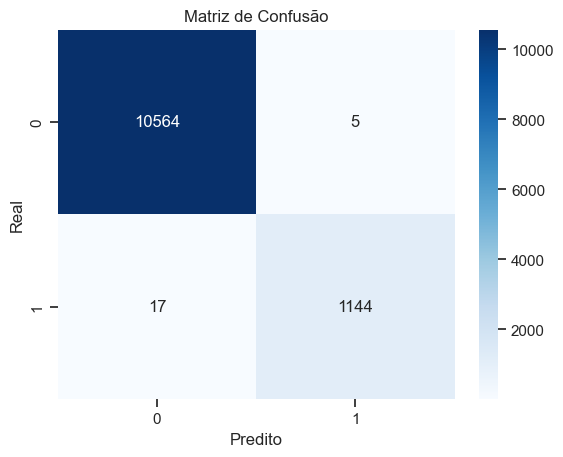

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# XGB Training
 

Now it's time to split the data into Independent and Dependent variables. Lets drop dates and id from the train dataset as we are going to the modelling part where we need only features.

In the features, Features activity_new, channel_sales and origin_up are the two categorical variables. Let's encode them.

In [ ]:
grid_hiper = {
    'objective': ['binary:logitraw'],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 500],
    'n_jobs': [-1, 1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
}

In [ ]:
gridsearch = GridSearchCV(xgb.XGBClassifier(), grid_hiper, cv=5)



In [ ]:
# fit the model on our train set
train_gs = gridsearch.fit(X_train, y_train)

In [ ]:
train_gs.best_score_



In [ ]:
train_gs.best_params_



In [ ]:
model = xgb.XGBClassifier(objective='binary:logitraw',
                          learning_rate=0.1,
                          max_depth=5,
                          n_estimators=500,
                          n_jobs=-1)
result = model.fit(X_train,y_train)

In [ ]:
def evaluate(model_, X_test_, y_test_):
 prediction_test_ = model_.predict(X_test_)
 probability_test_ = model_.predict_proba(X_test_)[:, 1]  # get the probabilities for the positive class
 auc_roc = metrics.roc_auc_score(y_test_, probability_test_)
 confusion = metrics.confusion_matrix(y_test_, prediction_test_)
 results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test_, prediction_test_)],
 "Precision" : [metrics.precision_score(y_test_, prediction_test_)],
 "Recall" : [metrics.recall_score(y_test_, prediction_test_)],
 "AUC-ROC": [auc_roc]
 })
 print("Confusion Matrix:")
 print(confusion)
 return results

In [ ]:
evaluate(model, X_train,y_train)



In [ ]:
evaluate(model, X_test, y_test)



# KNN Training

In [ ]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

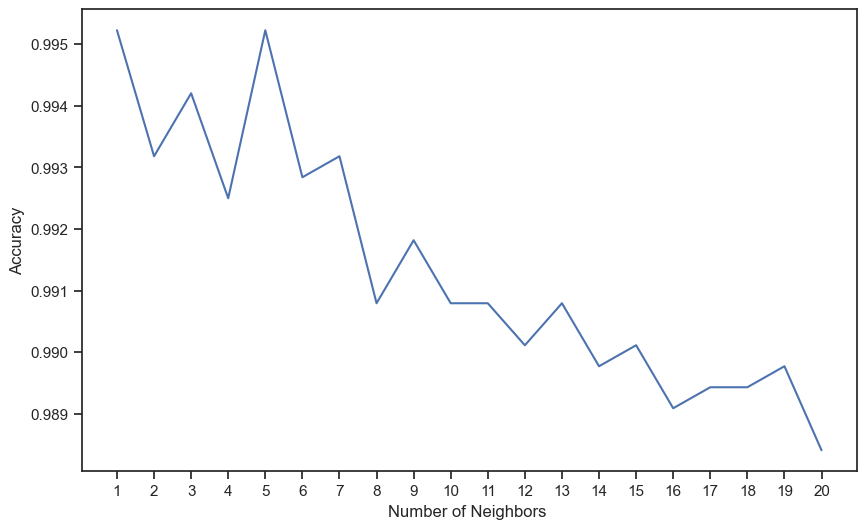

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
g_res.best_score_

0.9929236027555272

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')

In [ ]:
# Get predictions on the test set
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)


In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.9965905216501875


In [ ]:
print(confusion_matrix(y_train, y_hat))

[[10577     0]
 [    0  1152]]


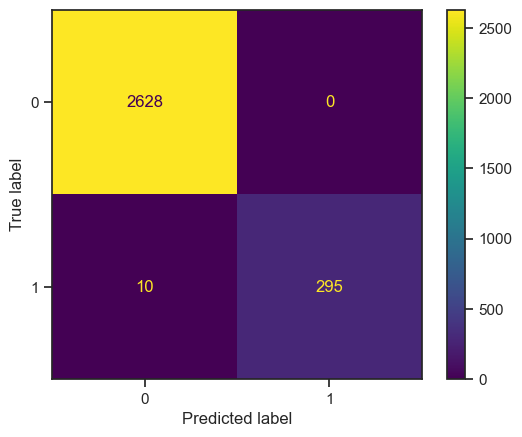

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_knn)).plot()
print()

In [ ]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      0.97      0.98       305

    accuracy                           1.00      2933
   macro avg       1.00      0.98      0.99      2933
weighted avg       1.00      1.00      1.00      2933



In [ ]:
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10577
           1       1.00      1.00      1.00      1152

    accuracy                           1.00     11729
   macro avg       1.00      1.00      1.00     11729
weighted avg       1.00      1.00      1.00     11729



In [ ]:
auc_roc = roc_auc_score(y_test, y_knn)
print(auc_roc)

0.9836065573770492
